In [1]:
import numpy as np
import pandas as po
from tqdm import tqdm
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
from filepaths import fp

In [4]:
df = po.read_csv('data/raw/EnergyConsumption_Theft.csv')
df

CONS_NO  FLAG  2014/1/1  2014/1/10  2014/1/11  \
0      0387DD8A07E07FDA6271170F86AD9151     1      0.00       0.00       0.00   
1      01D6177B5D4FFE0CABA9EF17DAFC2B84     1      0.00       0.00       0.00   
2      4B75AC4F2D8434CFF62DB64D0BB43103     1      0.00       0.00       0.00   
3      B32AC8CC6D5D805AC053557AB05F5343     1      0.00       0.00       0.00   
4      EDFC78B07BA2908B3395C4EB2304665E     1      2.90       3.42       3.81   
...                                 ...   ...       ...        ...        ...   
42367  F1472871E1AFF49D4289564B6377D76C     0      0.00       0.00       0.00   
42368  F3C8BBCD2DC26C1E0249DEEF6A4256B7     0      2.70       4.39       3.95   
42369  A9A0FE83467A680FBFB0DBFC910DF227     0      0.58       0.84       1.61   
42370  D9A6ADA018FA46A55D5438370456AA45     0     16.89      13.84      13.50   
42371  F3406636BAD1E6E0826E8EDDC9A1BF00     0      0.00       0.00       0.00   

       2014/1/12  2014/1/13  2014/1/14  2014/1/15  2014/1/16  ...  2016/9/28  \
0           0.00       0.00       0.00       0.00       0.00  ...      10.12   
1           0.00       0.00       0.00       0.00       0.00  ...       0.00   
2           0.00       0.00       0.00       0.00       0.00  ...       0.00   
3           0.00       0.00       0.00       0.00       0.00  ...       6.50   
4           4.58       3.56       4.25       3.86       3.53  ...      17.77   
...          ...        ...        ...        ...        ...  ...        ...   
42367       0.00       0.00       0.00       0.00       0.00  ...       4.25   
42368       0.00       0.00       0.00       0.00       0.00  ...       4.81   
42369       0.90       0.60       0.82       0.89       0.03  ...       0.33   
42370      14.60      14.46      12.34      15.37      17.01  ...      21.13   
42371       0.00       0.00       0.00       0.00       0.00  ...       2.80   

       2016/9/29  2016/9/3  2016/9/30   2016/9/4  2016/9/5  2016/9/6  \
0           9.96     16.92       7.60  27.160942     18.05     26.47   
1           0.00      0.00       0.00   0.000000      0.00      0.00   
2           0.00      0.00       0.00   0.000000      0.00      0.00   
3           9.99     11.78      18.59  26.800000     18.57     14.59   
4          10.37     15.32      13.51  12.230000     14.68     16.35   
...          ...       ...        ...        ...       ...       ...   
42367       3.56      3.38       4.39   3.720000      3.77      3.96   
42368       4.87      4.48       3.67   3.310000      4.58      3.33   
42369       0.66      2.92       2.36   3.860000      4.28      3.37   
42370      13.75     22.61      18.83  25.520000     18.11     19.31   
42371       4.45      9.80       5.11  12.161244     12.04      9.90   

        2016/9/7  2016/9/8  2016/9/9  
0      18.750000     17.84     14.92  
1       0.000000      0.00      0.00  
2       0.000000      0.00      0.00  
3      12.820000     19.37     15.92  
4      18.140000     18.41     17.31  
...          ...       ...       ...  
42367   3.640000      3.40      4.38  
42368   3.190000      4.57      4.00  
42369   5.085875      2.44      1.15  
42370  17.480000     17.20     15.28  
42371   8.230000      8.56      9.86  

[42372 rows x 1036 columns]

In [5]:
flag_col = df['FLAG'].copy()

In [6]:
df = df.drop(['FLAG', 'CONS_NO'], axis=1)
df_copy = df.copy()

In [7]:
#scaler = MinMaxScaler().fit(df)
#df = po.DataFrame(scaler.transform(df), columns=df_copy.columns)
#df

In [8]:
cols = list(df.columns)

In [9]:
cols_dates = []
for c in cols:
    dt_obj = datetime.strptime(c, "%Y/%m/%d")
    cols_dates.append(dt_obj)

In [10]:
cols_dates.sort()

In [11]:
cols = []
for c in cols_dates:
    cols.append(c.strftime("%Y/%-m/%-d"))

In [12]:
df = df[cols]

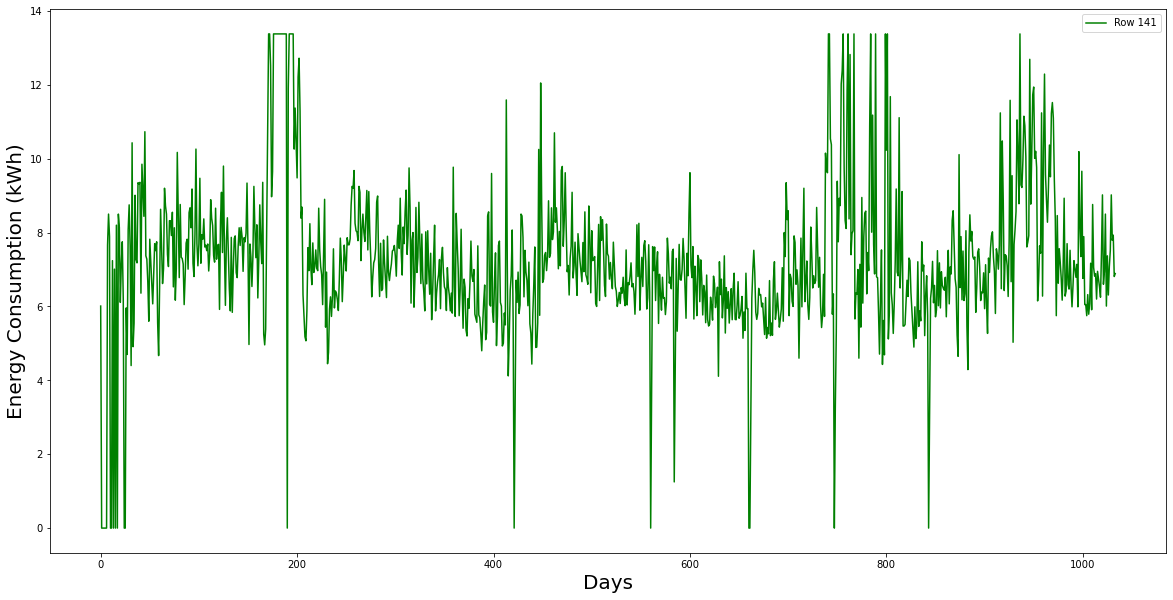

In [13]:
row = 141
plt.figure(figsize=(20, 10))
plt.plot(df.iloc[row].to_list(), color='green')
plt.xlabel('Days', fontsize=20)
plt.ylabel('Energy Consumption (kWh)', fontsize=20)
plt.legend(['Row {}'.format(row)])
plt.savefig('plots/data_analysis/row{}.png'.format(row))

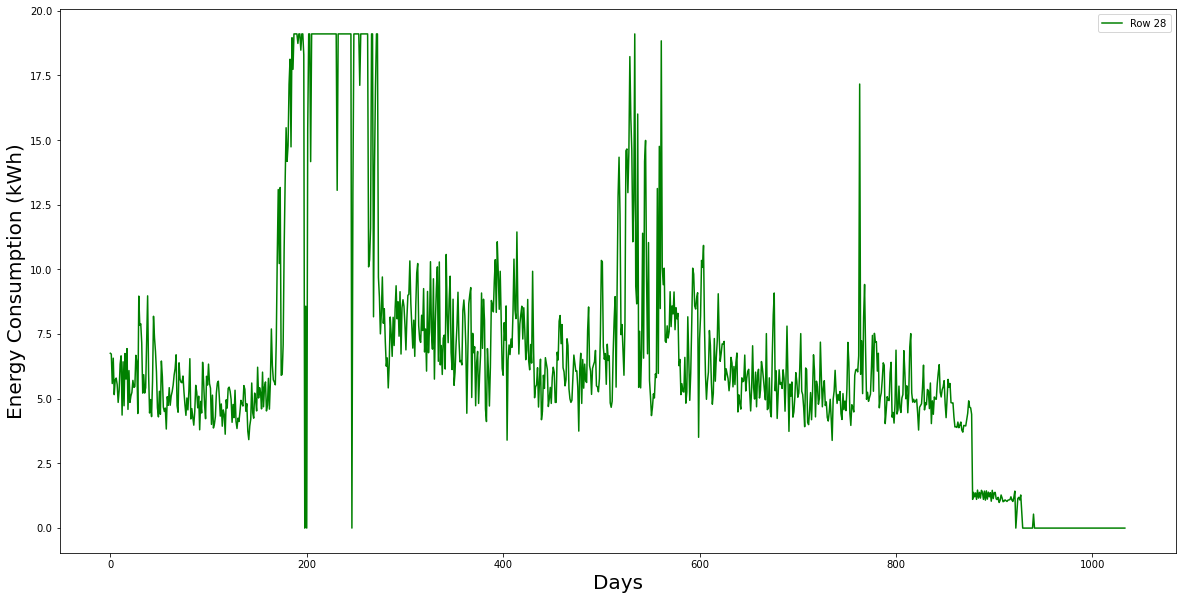

In [14]:
row = 28
plt.figure(figsize=(20, 10))
plt.plot(df.iloc[row].to_list(), color='green')
plt.xlabel('Days', fontsize=20)
plt.ylabel('Energy Consumption (kWh)', fontsize=20)
plt.legend(['Row {}'.format(row)])
plt.savefig('plots/data_analysis/row{}.png'.format(row))

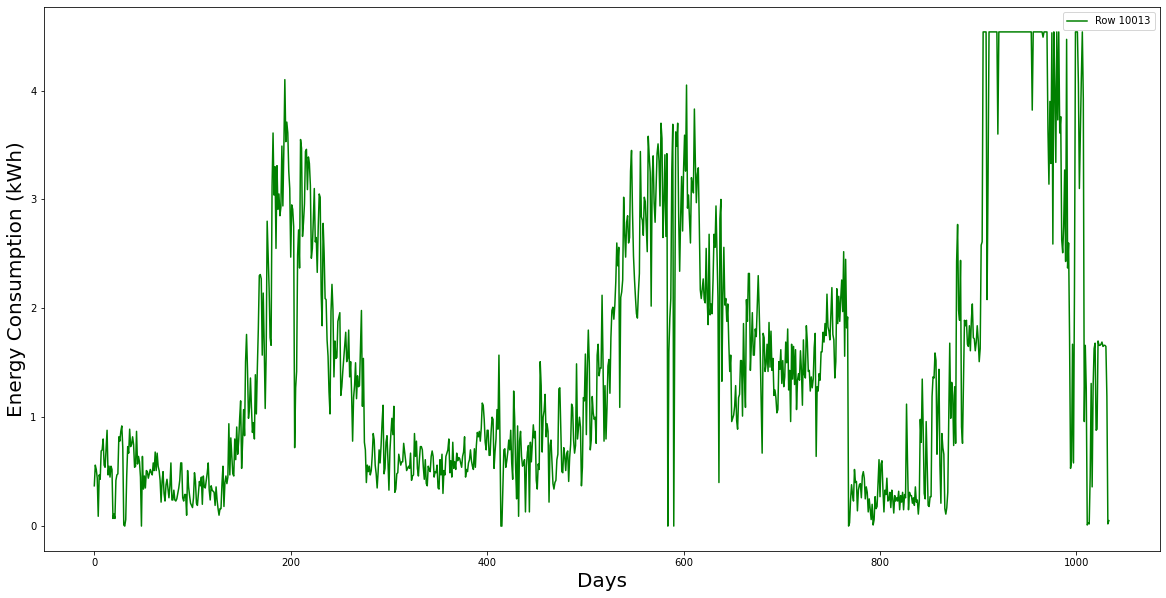

In [15]:
row = 10013
plt.figure(figsize=(20, 10))
plt.plot(df.iloc[row].to_list(), color='green')
plt.xlabel('Days', fontsize=20)
plt.ylabel('Energy Consumption (kWh)', fontsize=20)
plt.legend(['Row {}'.format(row)])
plt.savefig('plots/data_analysis/row{}.png'.format(row))

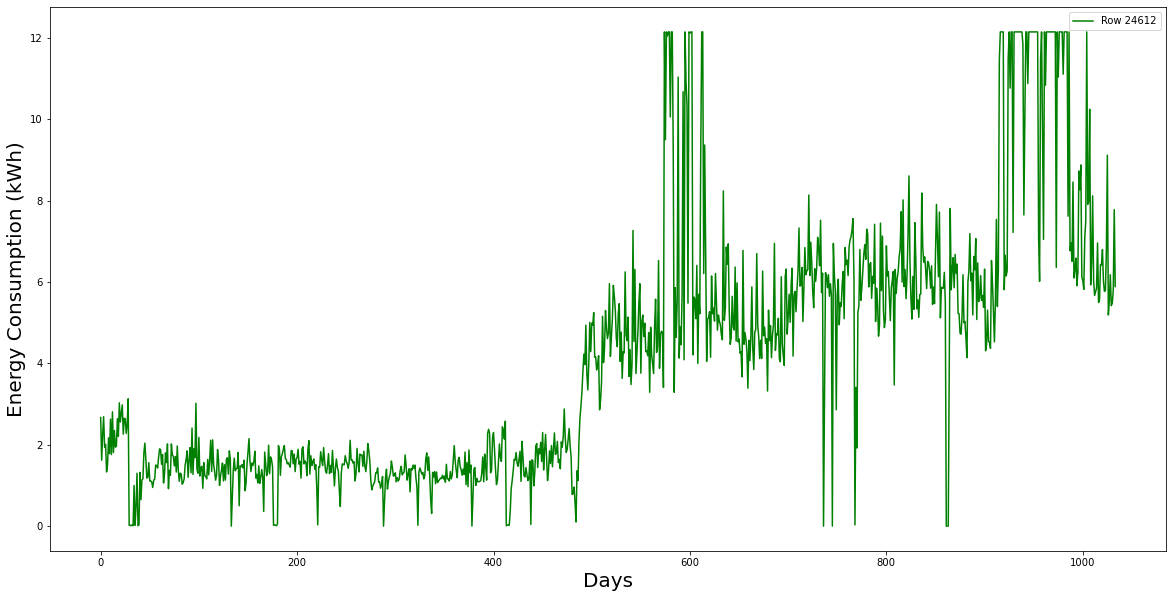

In [16]:
row = 24612
plt.figure(figsize=(20, 10))
plt.plot(df.iloc[row].to_list(), color='green')
plt.xlabel('Days', fontsize=20)
plt.ylabel('Energy Consumption (kWh)', fontsize=20)
plt.legend(['Row {}'.format(row)])
plt.savefig('plots/data_analysis/row{}.png'.format(row))

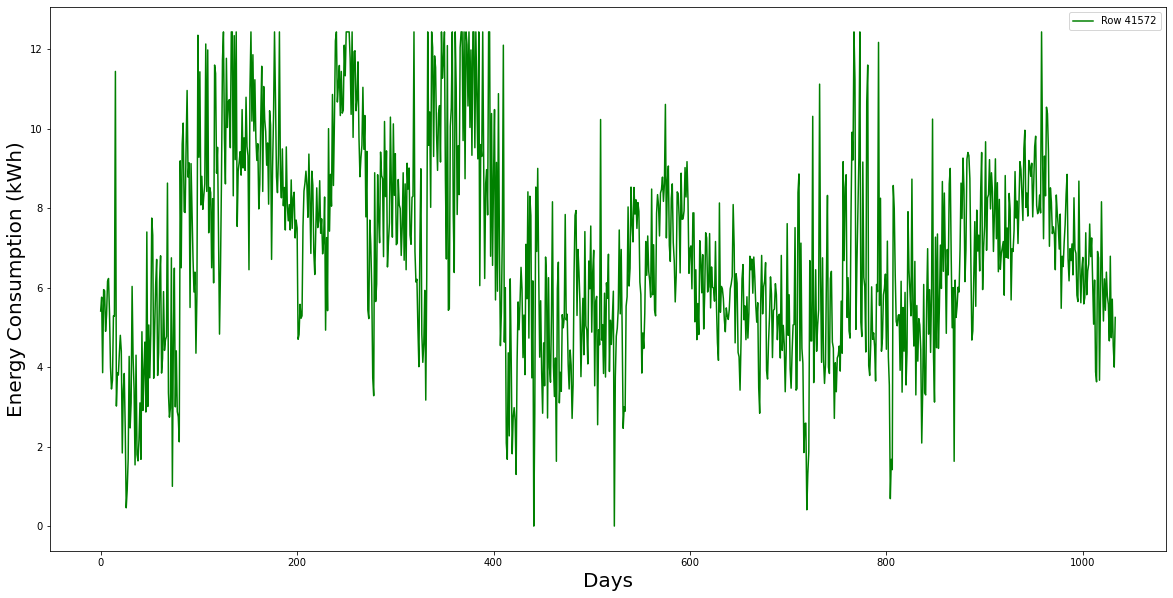

In [17]:
row = 41572
plt.figure(figsize=(20, 10))
plt.plot(df.iloc[row].to_list(), color='green')
plt.xlabel('Days', fontsize=20)
plt.ylabel('Energy Consumption (kWh)', fontsize=20)
plt.legend(['Row {}'.format(row)])
plt.savefig('plots/data_analysis/row{}.png'.format(row))

In [18]:
df['FLAG'] = flag_col

In [19]:
df.to_csv('data/processed/EnergyConsumption_processed.csv', index=False)

In [20]:
df

2014/1/1  2014/1/2  2014/1/3  2014/1/4  2014/1/5  2014/1/6  2014/1/7  \
0          0.00      0.00      0.00      0.00      0.00      0.00      0.00   
1          0.00      0.00      0.00      0.00      0.00      0.00      0.00   
2          0.00      0.00      0.00      0.00      0.00      0.00      0.00   
3          0.00      0.00      0.00      0.00      0.00      0.00      0.00   
4          2.90      5.64      6.99      3.32      3.61      5.35      4.73   
...         ...       ...       ...       ...       ...       ...       ...   
42367      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
42368      2.70      0.00      0.00      5.72      6.05      5.81      3.07   
42369      0.58      1.16      0.92      0.98      1.54      1.38      0.89   
42370     16.89     15.15     19.28     17.19     16.80     17.48     17.86   
42371      0.00      0.00      0.00      0.00      0.00      0.00      0.00   

       2014/1/8  2014/1/9  2014/1/10  ...  2016/10/23  2016/10/24  2016/10/25  \
0          0.00    13.130       0.00  ...    8.070000    8.090000    9.530000   
1          0.00     0.000       0.00  ...    0.000000    0.000000    0.000000   
2          0.00     0.000       0.00  ...   13.610504   13.610504   13.610504   
3          0.00     1.035       0.00  ...   15.120000   17.260000   14.910000   
4          3.68     3.530       3.42  ...   10.220000    8.470000    6.110000   
...         ...       ...        ...  ...         ...         ...         ...   
42367      0.00     2.310       0.00  ...    3.100000    2.750000    3.010000   
42368      4.04     5.680       4.39  ...    6.620000    3.120000    5.160000   
42369      0.70     1.230       0.84  ...    0.610000    0.650000    0.550000   
42370     23.99    12.340      13.84  ...   16.480000   13.040000   10.390000   
42371      0.00     0.000       0.00  ...   12.161244    8.350000    8.680000   

       2016/10/26  2016/10/27  2016/10/28  2016/10/29  2016/10/30  2016/10/31  \
0        5.480000    8.750000    9.300000    7.540000    9.160000    6.740000   
1        0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
2       13.610504   13.610504   13.610504   13.610504   13.610504   13.610504   
3       19.590000   20.790000   17.950000   19.260000   14.460000   11.720000   
4        6.100000    6.730000    7.520000   10.890000    9.860000    8.720000   
...           ...         ...         ...         ...         ...         ...   
42367    2.990000    2.830000    2.540000    3.400000    3.590000    2.540000   
42368    3.620000    4.640000    3.710000    6.220000    6.050000    4.770000   
42369    0.490000    0.510000    0.790000    0.660000    0.390000    0.650000   
42370   12.000000   11.150000   12.220000   13.160000   13.330000   10.390000   
42371    6.390000    7.960000    8.130000   11.500000    7.160000    5.250000   

       FLAG  
0         1  
1         1  
2         1  
3         1  
4         1  
...     ...  
42367     0  
42368     0  
42369     0  
42370     0  
42371     0  

[42372 rows x 1035 columns]

In [21]:
df = po.read_csv('data/processed/EnergyConsumption_processed.csv')

In [22]:
df_0 = df[df['FLAG'] == 0].drop('FLAG', axis=1).reset_index(drop=True) # Normal user
df_1 = df[df['FLAG'] == 1].drop('FLAG', axis=1).reset_index(drop=True) # Abnormal user (energy thief)

In [23]:
len(df_0)

38757

In [24]:
len(df_1)

3615

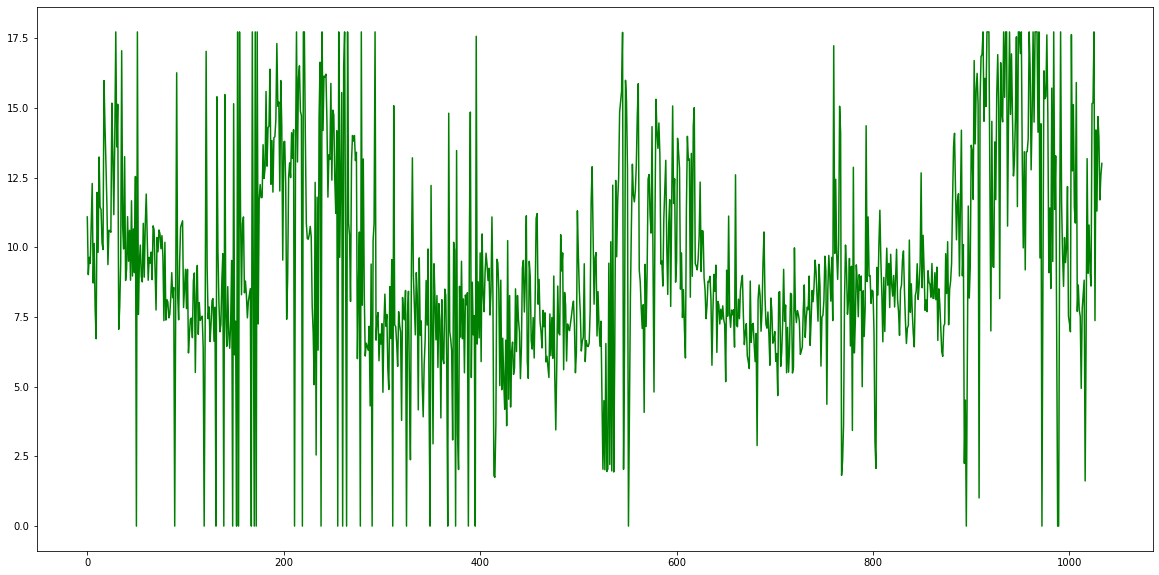

In [25]:
normal_row = 154
plt.figure(figsize=(20, 10))
plt.plot(df_0.iloc[normal_row].to_list(), color='green')
plt.savefig('plots/data_analysis/normal_row{}.png'.format(normal_row))

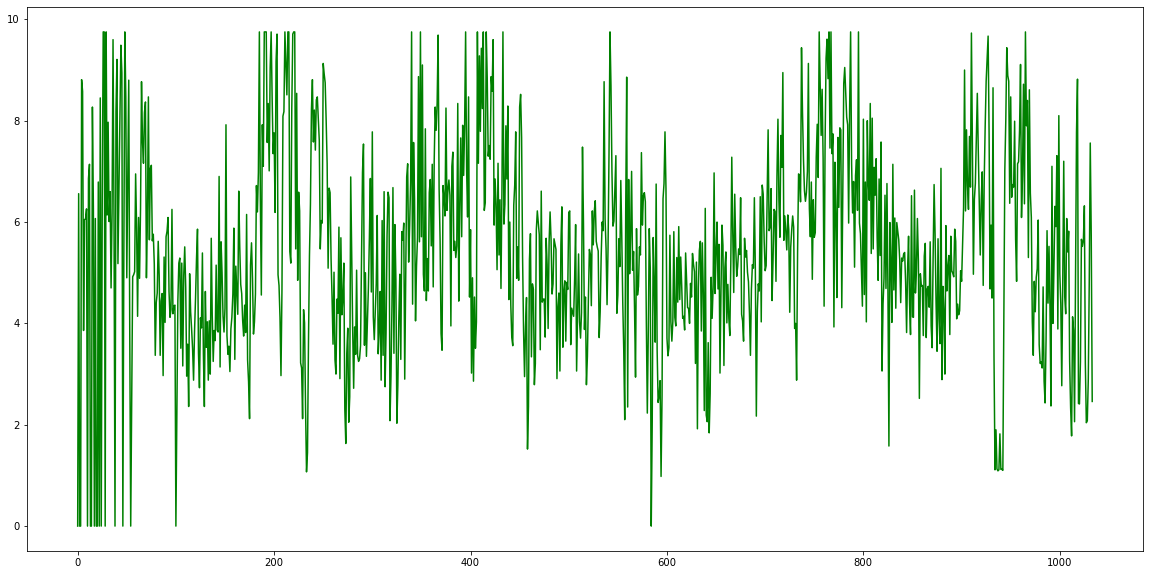

In [26]:
normal_row = 3419
plt.figure(figsize=(20, 10))
plt.plot(df_0.iloc[normal_row].to_list(), color='green')
plt.savefig('plots/data_analysis/normal_row{}.png'.format(normal_row))

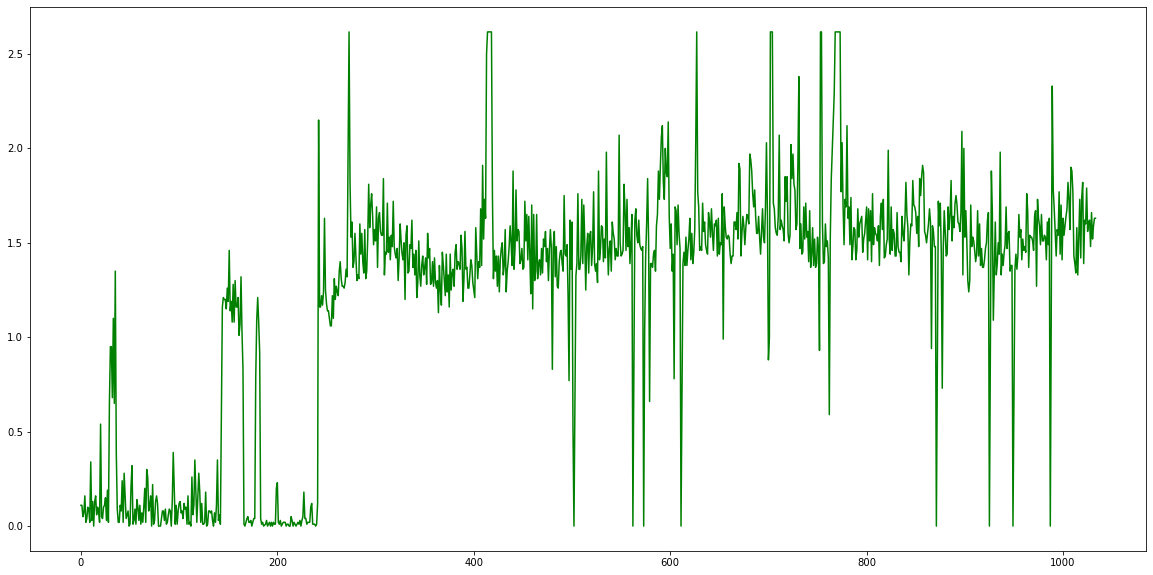

In [27]:
normal_row = 15886
plt.figure(figsize=(20, 10))
plt.plot(df_0.iloc[normal_row].to_list(), color='green')
plt.savefig('plots/data_analysis/normal_row{}.png'.format(normal_row))

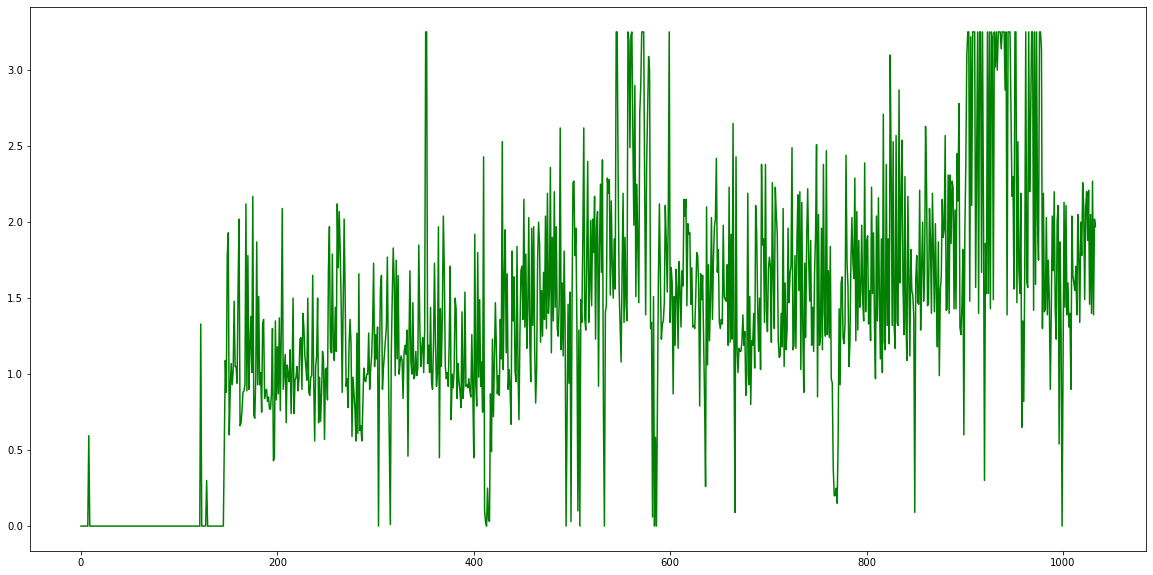

In [28]:
normal_row = 28842
plt.figure(figsize=(20, 10))
plt.plot(df_0.iloc[normal_row].to_list(), color='green')
plt.savefig('plots/data_analysis/normal_row{}.png'.format(normal_row))

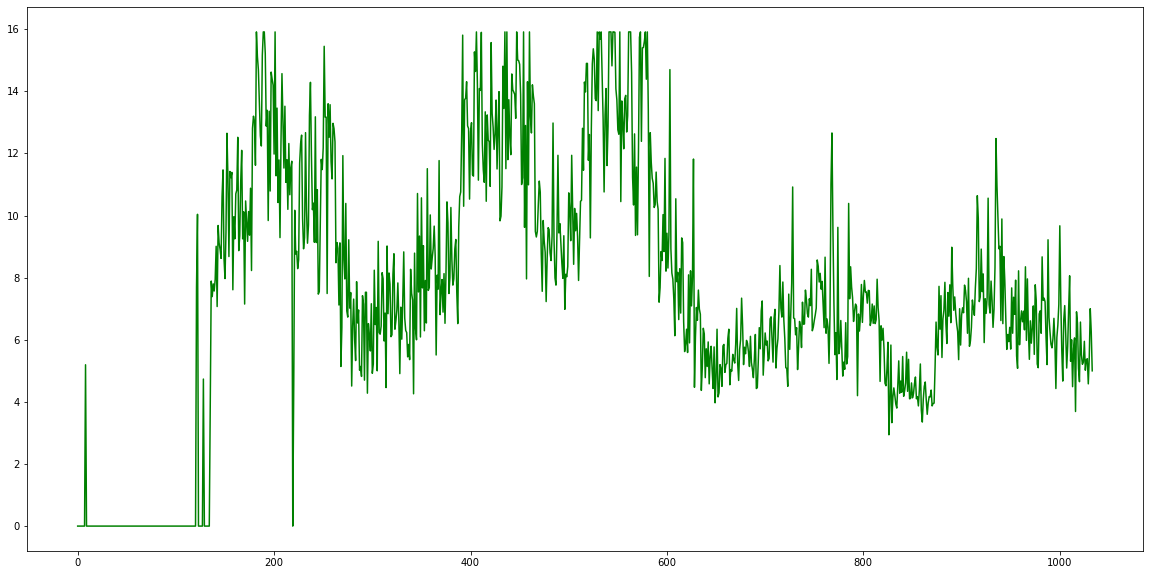

In [29]:
normal_row = 36222
plt.figure(figsize=(20, 10))
plt.plot(df_0.iloc[normal_row].to_list(), color='green')
plt.savefig('plots/data_analysis/normal_row{}.png'.format(normal_row))

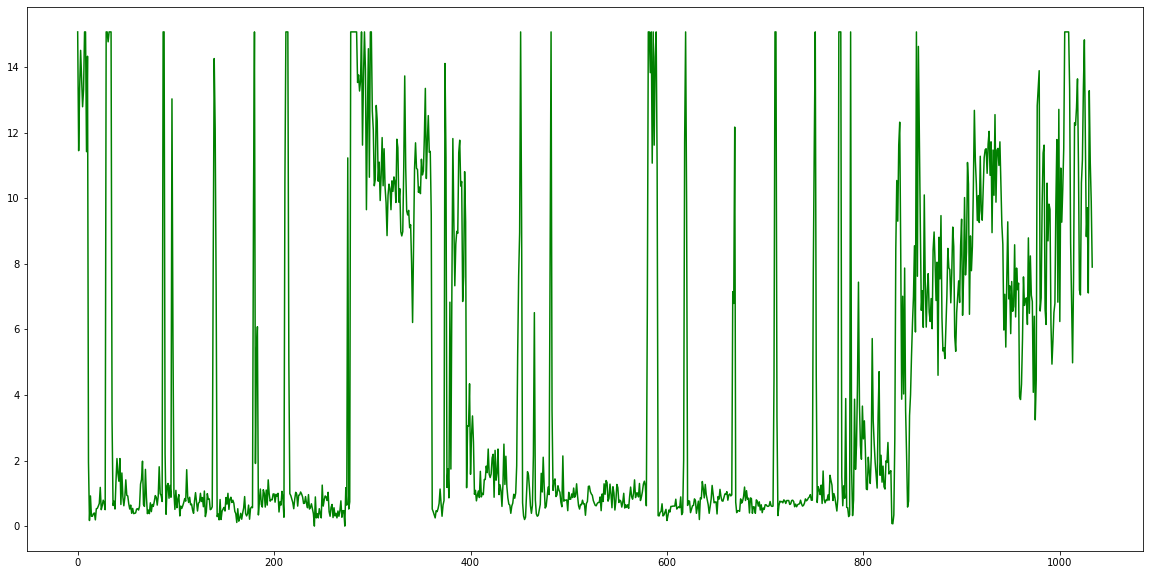

In [30]:
abnormal_row = 31
plt.figure(figsize=(20, 10))
plt.plot(df_1.iloc[abnormal_row].to_list(), color='green')
plt.savefig('plots/data_analysis/abnormal_row{}.png'.format(abnormal_row))

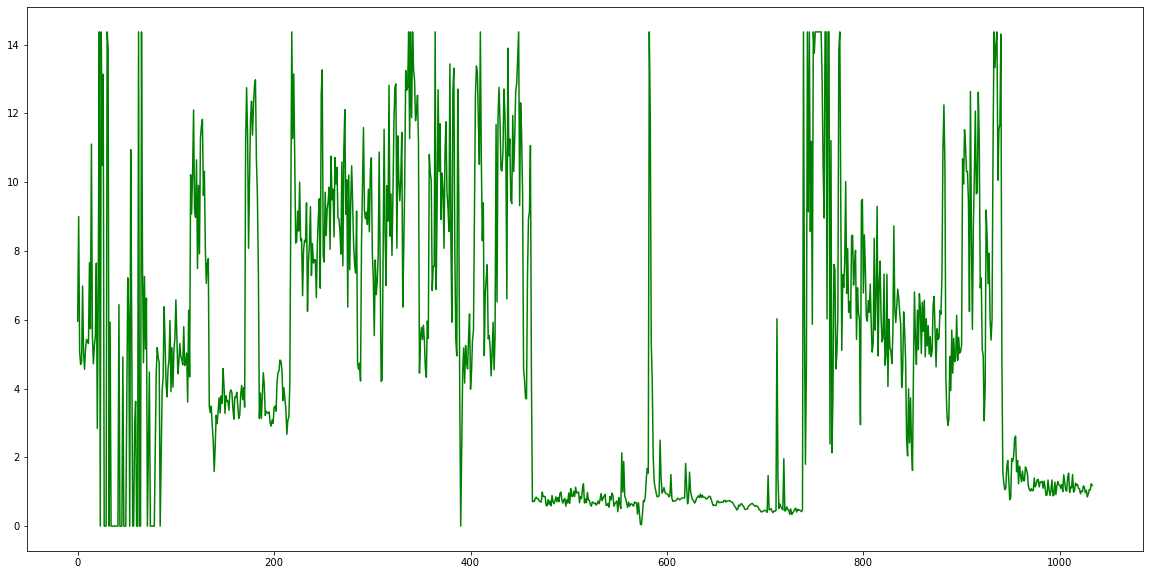

In [31]:
abnormal_row = 52
plt.figure(figsize=(20, 10))
plt.plot(df_1.iloc[abnormal_row].to_list(), color='green')
plt.savefig('plots/data_analysis/abnormal_row{}.png'.format(abnormal_row))

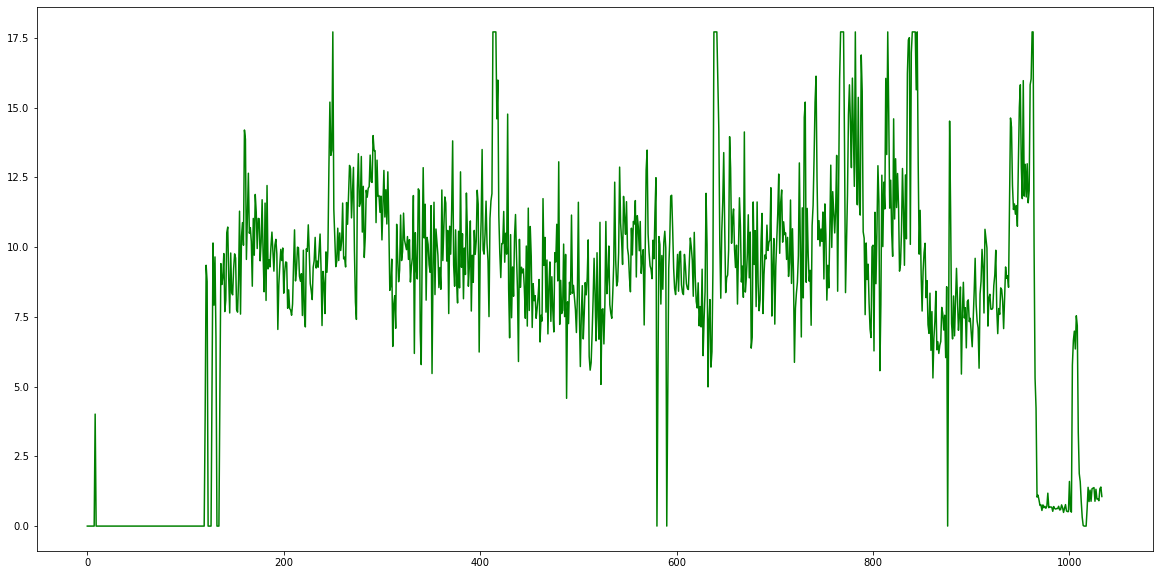

In [32]:
abnormal_row = 312
plt.figure(figsize=(20, 10))
plt.plot(df_1.iloc[abnormal_row].to_list(), color='green')
plt.savefig('plots/data_analysis/abnormal_row{}.png'.format(abnormal_row))

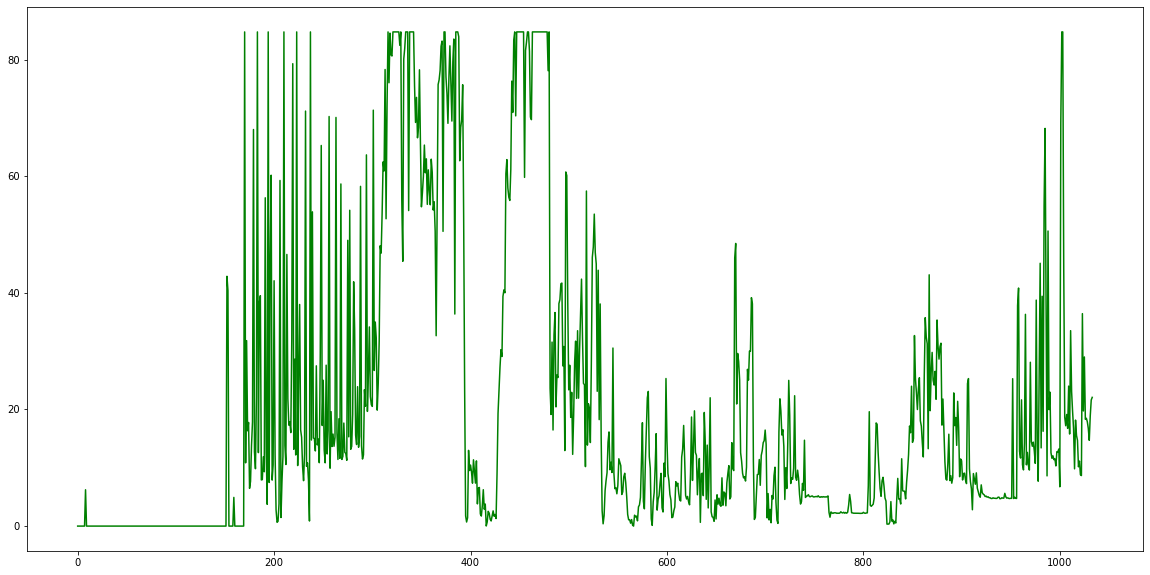

In [33]:
abnormal_row = 1325
plt.figure(figsize=(20, 10))
plt.plot(df_1.iloc[abnormal_row].to_list(), color='green')
plt.savefig('plots/data_analysis/abnormal_row{}.png'.format(abnormal_row))

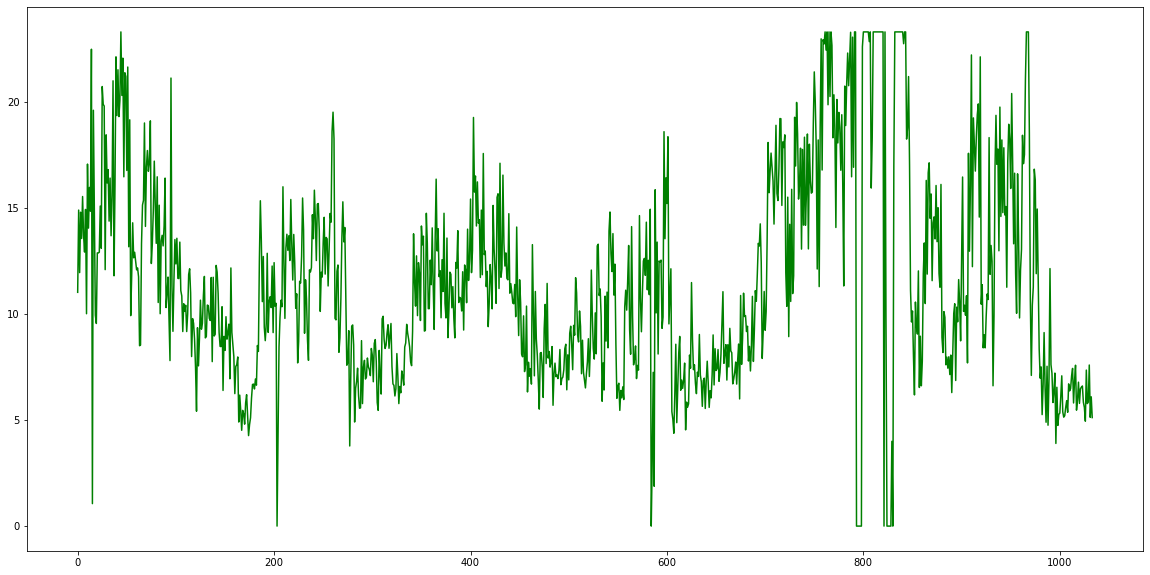

In [34]:
abnormal_row = 3297
plt.figure(figsize=(20, 10))
plt.plot(df_1.iloc[abnormal_row].to_list(), color='green')
plt.savefig('plots/data_analysis/abnormal_row{}.png'.format(abnormal_row))

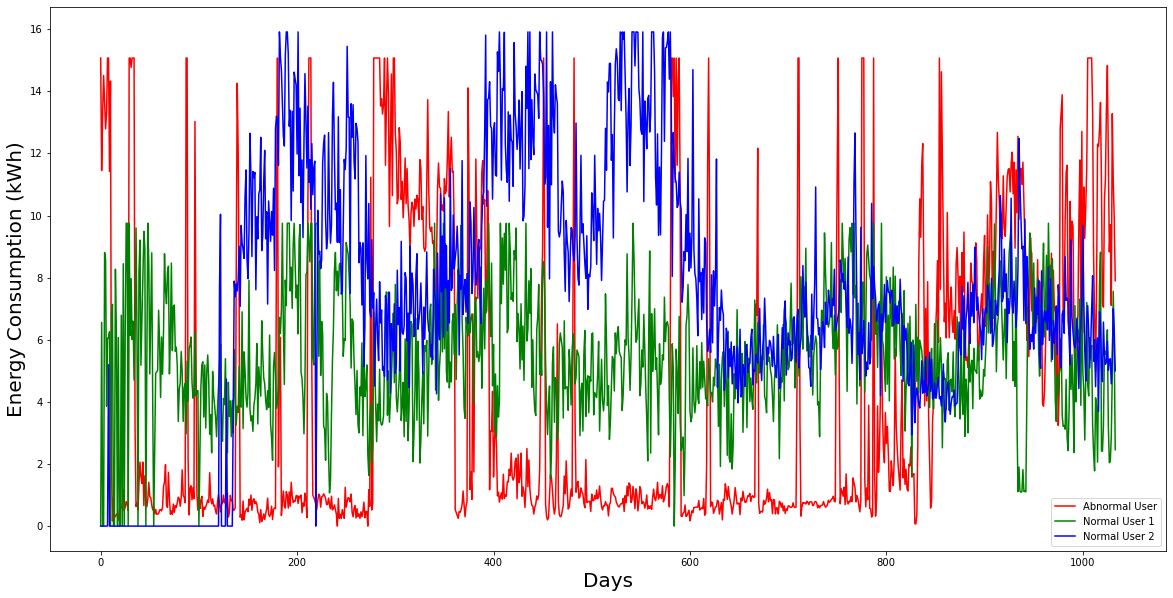

In [35]:
normal_row_1 = 3419
normal_row_2 = 36222
abnormal_row = 31
plt.figure(figsize=(20, 10))
plt.plot(df_1.iloc[abnormal_row].to_list(), color='red')
plt.plot(df_0.iloc[normal_row_1].to_list(), color='green')
plt.plot(df_0.iloc[normal_row_2].to_list(), color='blue')
plt.xlabel('Days', fontsize=20)
plt.ylabel('Energy Consumption (kWh)', fontsize=20)
plt.legend(['Abnormal User', 'Normal User 1', 'Normal User 2'])
plt.savefig('plots/data_analysis/normal_vs_abnormal.png')

In [36]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [37]:
flag_col = df

In [38]:
df = df.drop('FLAG', axis=1)

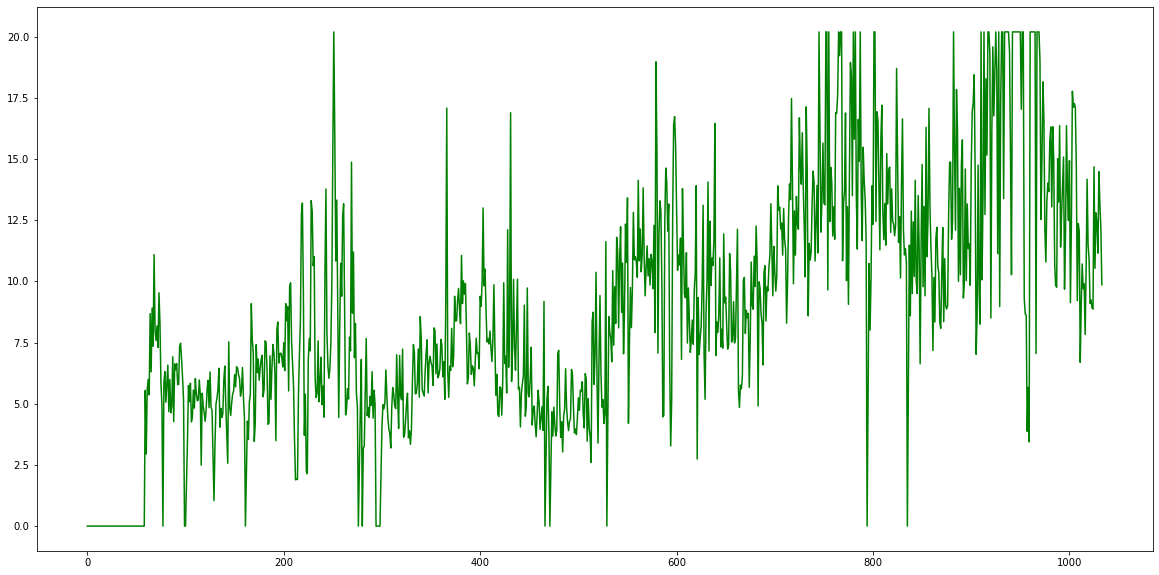

In [39]:
plt.figure(figsize=(20, 10))
plt.plot(df.iloc[1445].to_list(), color='green')

In [38]:
weekdays = []
weekends = []
for i in range(0, len(days_35), 7):
    weekdays += days_35[i:i+5] 
    weekends += days_35[i+5:i+7]

NameError: name 'days_35' is not defined

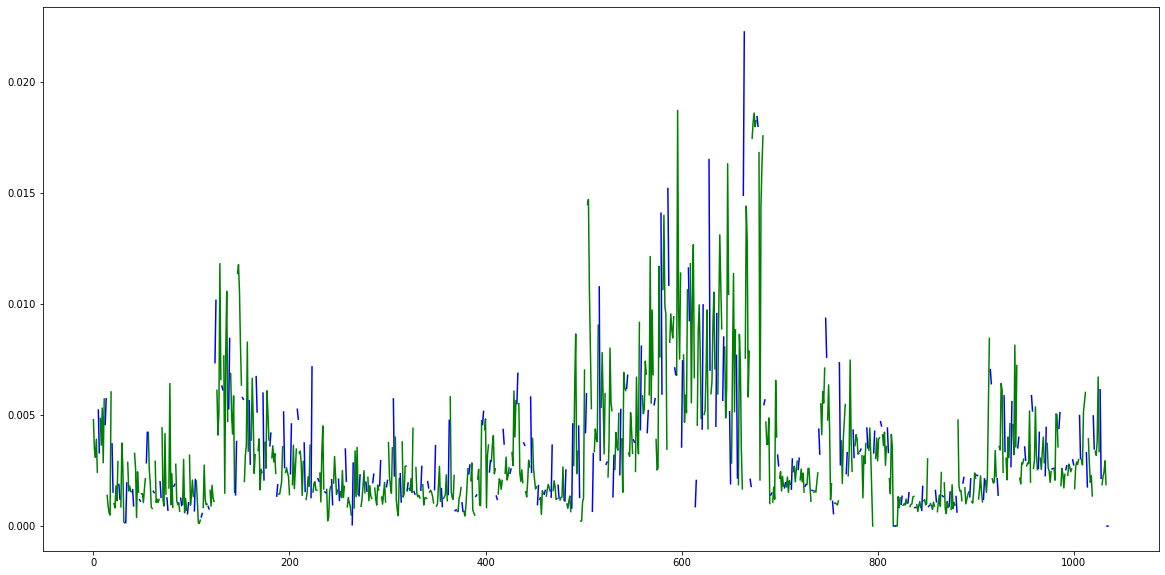

In [52]:
plt.figure(figsize=(20, 10))
plt.plot(weekdays, color='green')
plt.plot(weekends, color='blue')
#2014/1/1      2.90

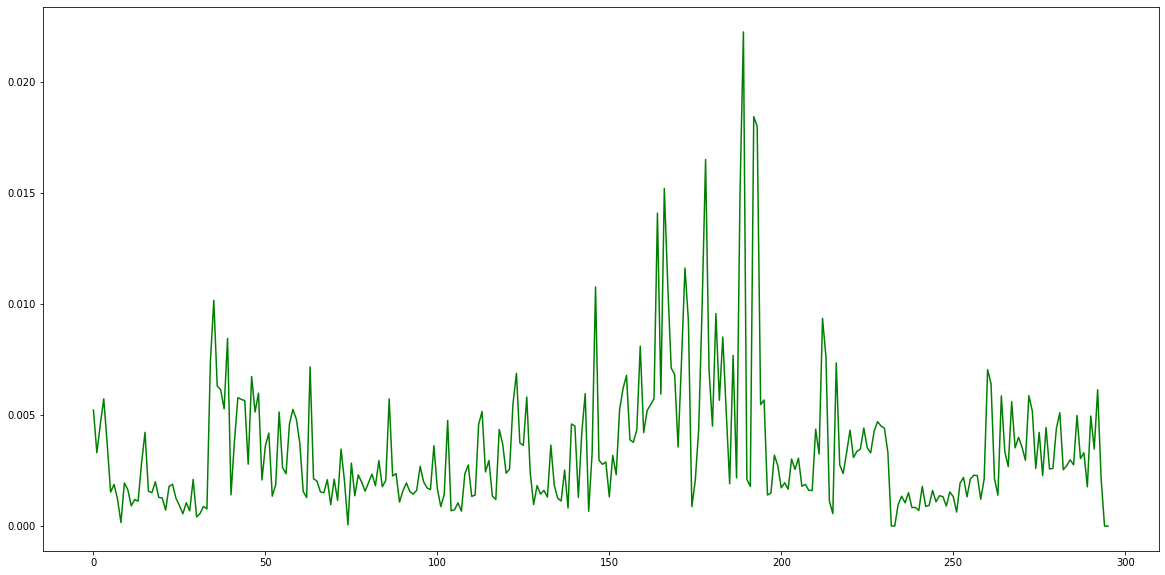

In [33]:
plt.figure(figsize=(20, 10))
plt.plot(weekends, color='green')

In [13]:
cos_sim = cosine_similarity(df_0.to_numpy(), df_1.to_numpy())

In [14]:
np.argmax(cos_sim[:, 4])

17753

In [25]:
df.columns

Index(['2014/1/1', '2014/1/10', '2014/1/11', '2014/1/12', '2014/1/13',
       '2014/1/14', '2014/1/15', '2014/1/16', '2014/1/17', '2014/1/18',
       ...
       '2016/9/29', '2016/9/3', '2016/9/30', '2016/9/4', '2016/9/5',
       '2016/9/6', '2016/9/7', '2016/9/8', '2016/9/9', 'FLAG'],
      dtype='object', length=1035)

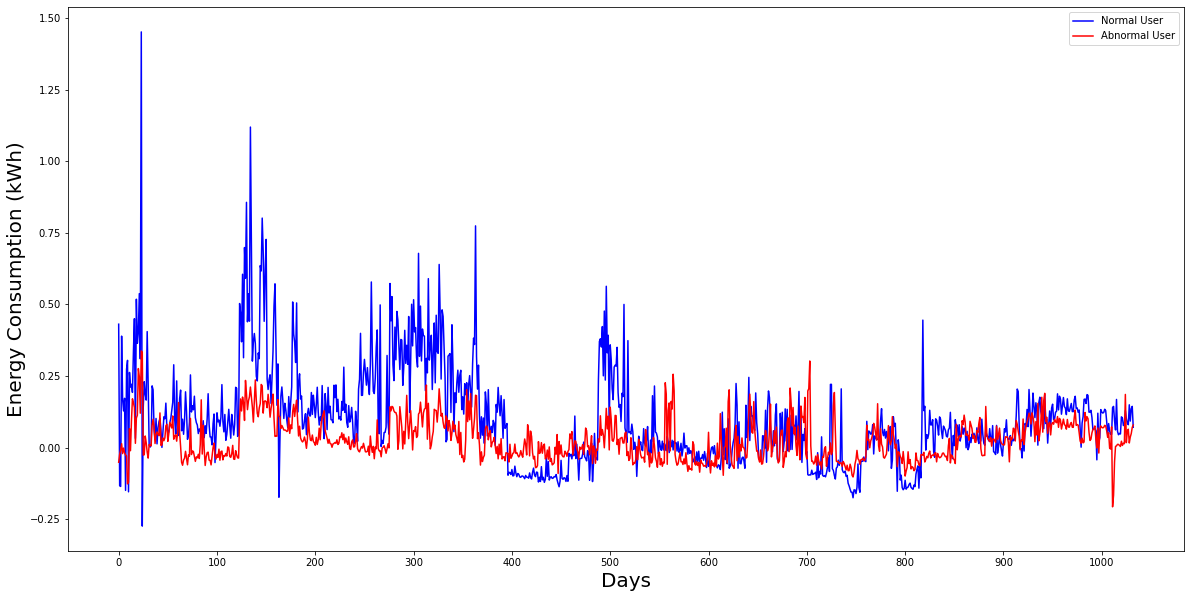

In [35]:
plt.figure(figsize=(20, 10))
plt.plot(df_0.iloc[17753][:-1], color='blue')
plt.plot(df_1.iloc[4][:-1], color='red')
plt.xticks(range(0, len(df_1.iloc[4][:-1]), 100), range(0, len(df_1.iloc[4][:-1]), 100)) 
plt.xlabel('Days', fontsize=20)
plt.ylabel('Energy Consumption (kWh)', fontsize=20)
plt.legend(['Normal User', 'Abnormal User'])
plt.savefig('plots/data_analysis/1.csv')

In [42]:
i = 14231

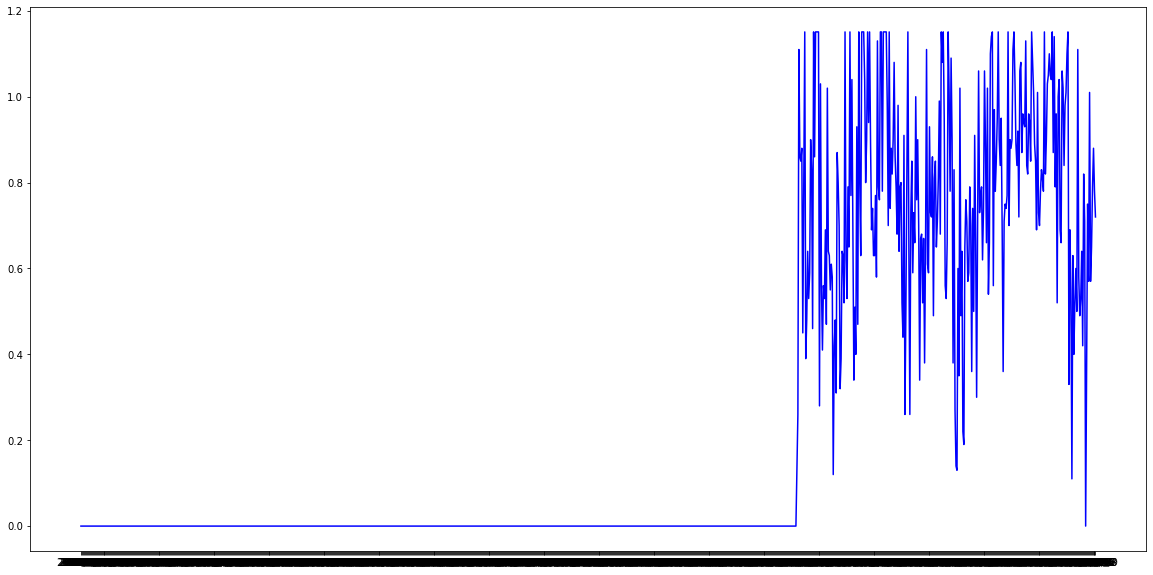

In [43]:
plt.figure(figsize=(20, 10))
plt.plot(df.iloc[i], color='blue')

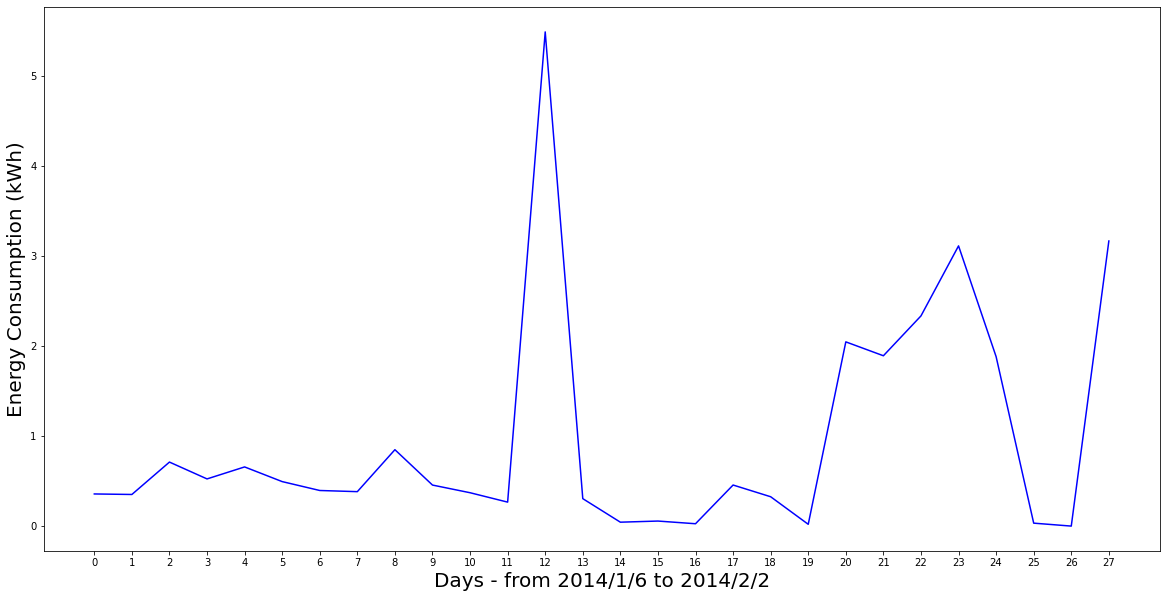

In [30]:
plot_this = df.loc[i, '2014/1/6':'2014/2/2']
plt.figure(figsize=(20, 10))
plt.plot(plot_this, color='blue')
plt.xticks(range(0, len(plot_this)), range(0, len(plot_this))) 
plt.xlabel('Days - from 2014/1/6 to 2014/2/2', fontsize=20)
plt.ylabel('Energy Consumption (kWh)', fontsize=20)
plt.savefig('plots/seasonality/row_10013_4_weeks.png')

In [31]:
row = df.loc[i, '2014/1/6':'2016/10/31'].to_list()
weekdays = []
weekends = []
for j in range(0, len(row), 7):
    weekdays += row[j:j+5] + [None]*2
    weekends += [None]*5 + row[j+5:j+7] 

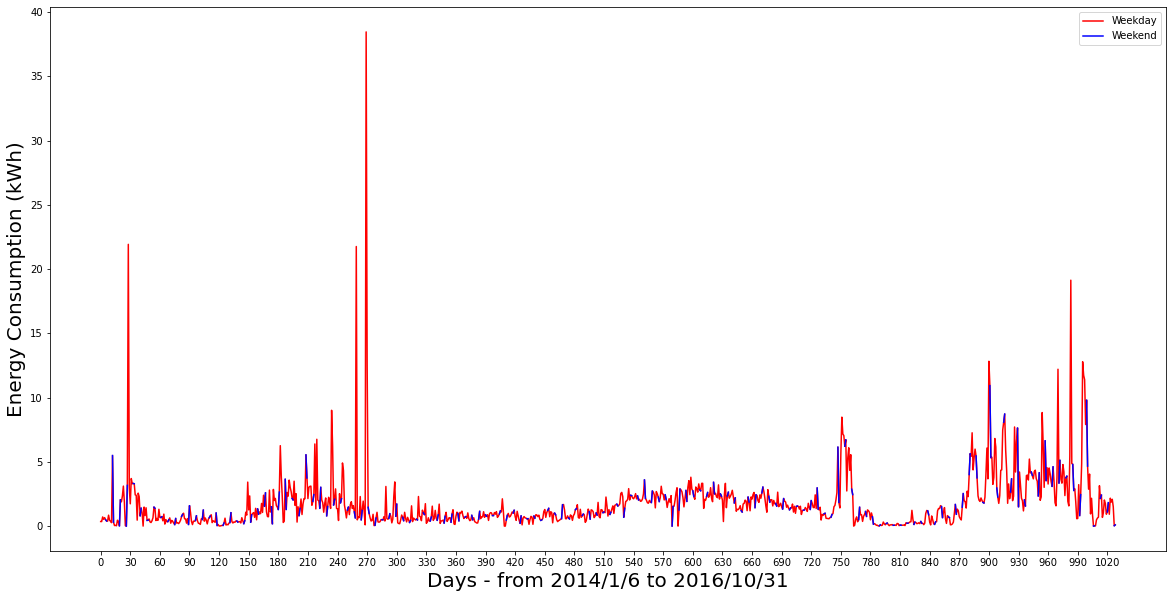

In [32]:
plt.figure(figsize=(20, 10))
plt.plot(row, color='red')
plt.plot(weekends, color='blue')
plt.xticks(range(0, len(row), 30), range(0, len(row), 30)) 
plt.xlabel('Days - from 2014/1/6 to 2016/10/31', fontsize=20)
plt.ylabel('Energy Consumption (kWh)', fontsize=20)
plt.legend(['Weekday', 'Weekend'])
plt.savefig('plots/seasonality/row_10013_weekday_weekend.png')

In [35]:
row = df.loc[i, '2014/1/6':'2016/10/31'].to_list()
weekdays = []
weekends = []
for j in range(0, len(row), 7):
    weekdays += row[j:j+5] 
    weekends += row[j+5:j+7] 

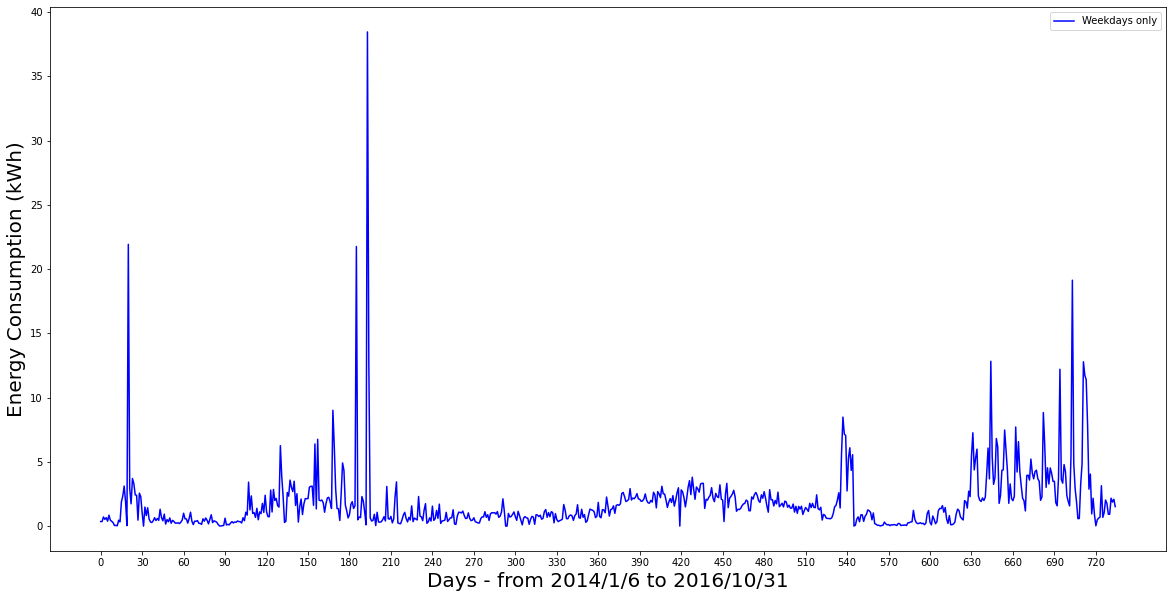

In [36]:
plt.figure(figsize=(20, 10))
plt.plot(weekdays, color='blue')
plt.xticks(range(0, len(weekdays), 30), range(0, len(weekdays), 30)) 
plt.xlabel('Days - from 2014/1/6 to 2016/10/31', fontsize=20)
plt.ylabel('Energy Consumption (kWh)', fontsize=20)
plt.legend(['Weekdays only'])
plt.savefig('plots/seasonality/row_10013_weekday_only.png')

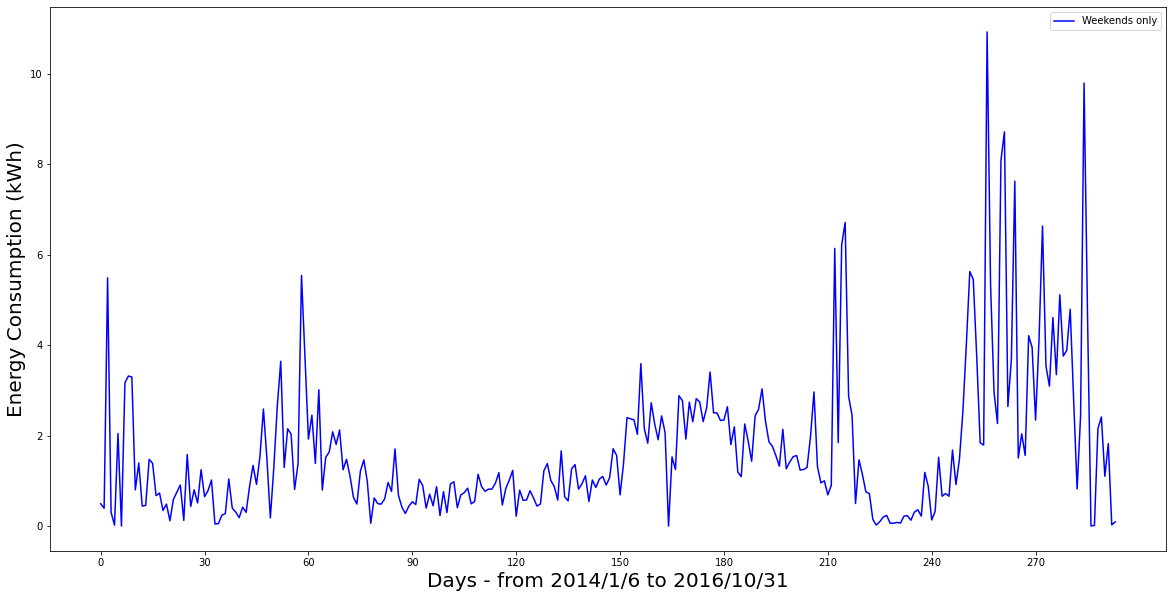

In [37]:
plt.figure(figsize=(20, 10))
plt.plot(weekends, color='blue')
plt.xticks(range(0, len(weekends), 30), range(0, len(weekends), 30)) 
plt.xlabel('Days - from 2014/1/6 to 2016/10/31', fontsize=20)
plt.ylabel('Energy Consumption (kWh)', fontsize=20)
plt.legend(['Weekends only'])
plt.savefig('plots/seasonality/row_10013_weekend_only.png')

In [38]:
row = df.loc[i, '2014/9/1':'2014/10/1'].to_list()
weekdays = []
weekends = []
for j in range(0, len(row), 7):
    weekdays += row[j:j+5] 
    weekends += row[j+5:j+7] 

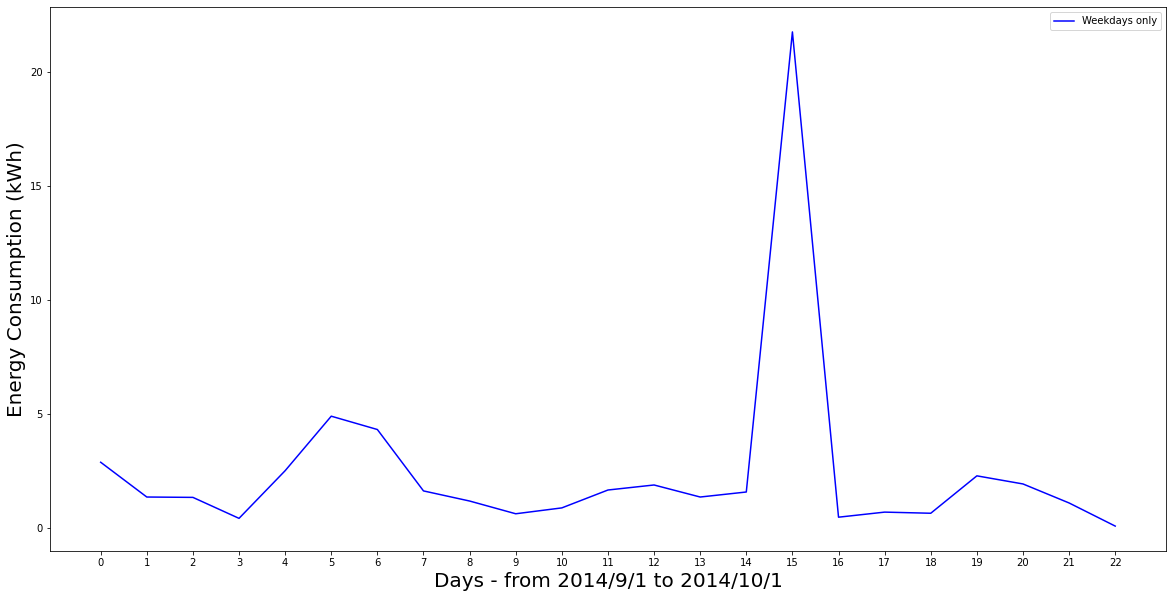

In [39]:
plt.figure(figsize=(20, 10))
plt.plot(weekdays, color='blue')
plt.xticks(range(0, len(weekdays)), range(0, len(weekdays))) 
plt.xlabel('Days - from 2014/9/1 to 2014/10/1', fontsize=20)
plt.ylabel('Energy Consumption (kWh)', fontsize=20)
plt.legend(['Weekdays only'])
plt.savefig('plots/seasonality/row_10013_weekday_only_one_month.png')

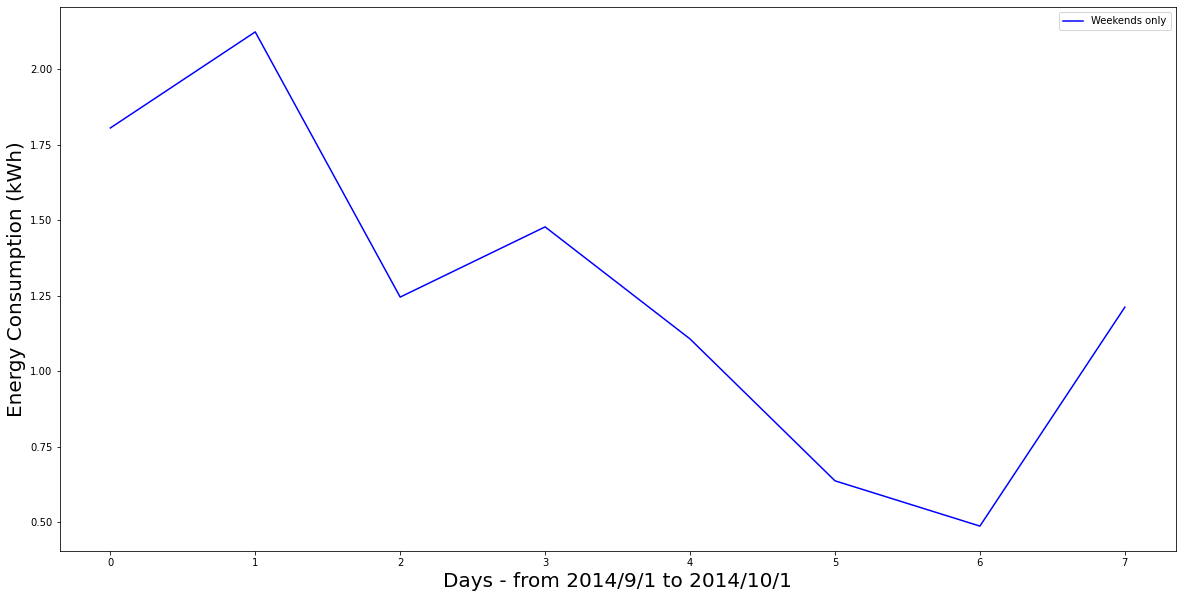

In [40]:
plt.figure(figsize=(20, 10))
plt.plot(weekends, color='blue')
plt.xticks(range(0, len(weekends)), range(0, len(weekends))) 
plt.xlabel('Days - from 2014/9/1 to 2014/10/1', fontsize=20)
plt.ylabel('Energy Consumption (kWh)', fontsize=20)
plt.legend(['Weekends only'])
plt.savefig('plots/seasonality/row_10013_weekend_only_one_month.png')

In [40]:
# Seasons Analysis

In [41]:
import collections

In [42]:
df

2014/1/1  2014/1/2  2014/1/3  2014/1/4  2014/1/5  2014/1/6  2014/1/7  \
0          0.00      0.00      0.00      0.00      0.00      0.00      0.00   
1         11.89     11.61     14.80      9.74     15.99     18.93     14.17   
2          0.00      0.00      0.00      0.00      0.00      0.00      0.00   
3          0.00      0.00      0.00      0.00      0.00      0.00      0.00   
4          6.17     10.35     10.77     10.53     11.58     11.27     11.22   
...         ...       ...       ...       ...       ...       ...       ...   
42367      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
42368      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
42369     11.57      9.95      8.41     16.34      7.83     12.55     12.29   
42370      0.00      0.00      0.00      0.00      0.00      0.00      0.00   
42371      0.00      0.00      0.00      0.00      0.00      0.00      0.00   

       2014/1/8  2014/1/9  2014/1/10  ...  2016/10/22  2016/10/23  2016/10/24  \
0          0.00     0.000       0.00  ...        0.00    0.000000        0.00   
1          0.00     0.000       0.00  ...       17.20   12.640000       12.62   
2          0.00     0.865       0.00  ...        8.53   10.250000        6.66   
3          0.00     2.825       0.00  ...        8.63    9.230000        5.38   
4         10.49    10.560      10.57  ...       50.45   51.239517       32.66   
...         ...       ...        ...  ...         ...         ...         ...   
42367      0.00     0.000       0.00  ...      268.62  225.290000      236.69   
42368      0.00     0.000       0.00  ...        0.00    0.000000        0.00   
42369      4.94    10.320       0.00  ...       23.16   18.730000       16.06   
42370      0.00     0.000       0.00  ...        4.83    6.399595        4.49   
42371      0.00     0.000       0.00  ...        0.00    0.000000        0.00   

       2016/10/25  2016/10/26  2016/10/27  2016/10/28  2016/10/29  2016/10/30  \
0        0.000000    0.000000    0.000000    0.000000        0.00        0.00   
1       11.580000   11.470000   11.240000   12.990000       11.24        7.05   
2        9.580000    8.860000    9.160000    8.860000        6.56        6.22   
3        7.660000    4.190000    9.630000    5.310000        8.77        9.15   
4       42.320000   51.239517   51.239517   51.239517       33.05       26.97   
...           ...         ...         ...         ...         ...         ...   
42367  201.710000  256.980000  272.500000  277.860000      224.85      193.03   
42368    0.000000    0.000000    0.000000    0.000000        0.00        0.00   
42369   11.540000   15.500000   21.840000   19.830000       14.67       14.64   
42370    6.399595    6.399595    6.399595    5.840000        4.41        5.15   
42371    0.000000    0.000000    0.000000    0.000000        0.00        0.00   

       2016/10/31  
0            0.00  
1           10.73  
2            6.63  
3            6.65  
4           30.16  
...           ...  
42367      196.77  
42368        0.00  
42369       15.23  
42370        5.03  
42371        0.00  

[42372 rows x 1034 columns]

In [43]:
num_zeros = []
for i in range(len(df)):
    counts = dict(collections.Counter(df.iloc[i]))
    if 0 in counts.keys():
        num_zeros.append(counts[0])
    else:
        num_zeros.append(0)

In [44]:
df['num_zeros'] = num_zeros

In [45]:
df = df.sort_values('num_zeros').reset_index(drop=True)

In [46]:
i = 2

In [48]:
df = df.drop('num_zeros', axis=1)

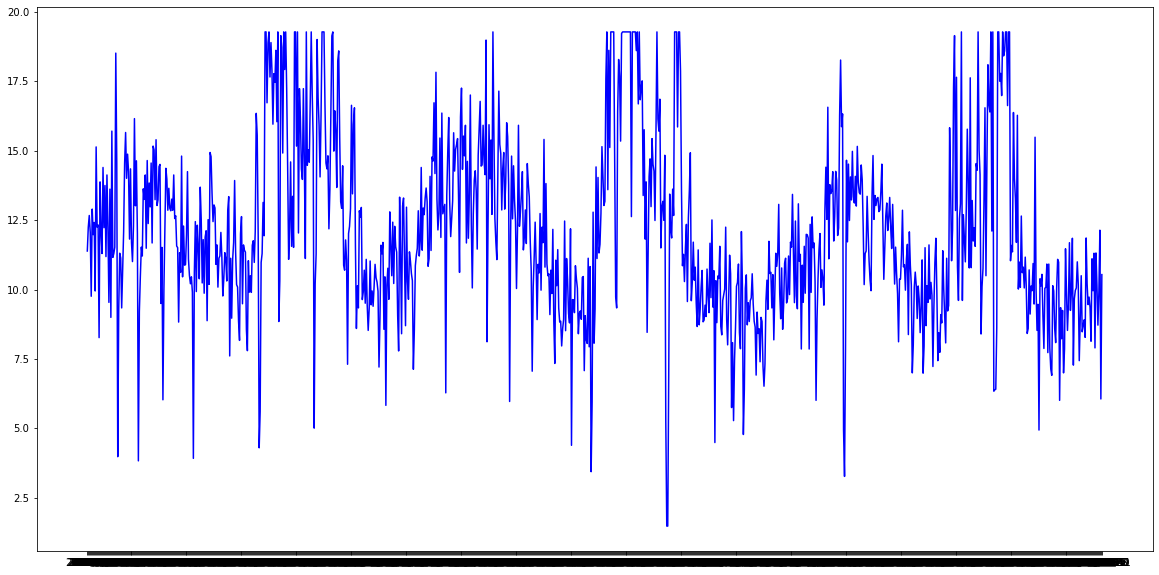

In [49]:
plt.figure(figsize=(20, 10))
plt.plot(df.iloc[i], color='blue')

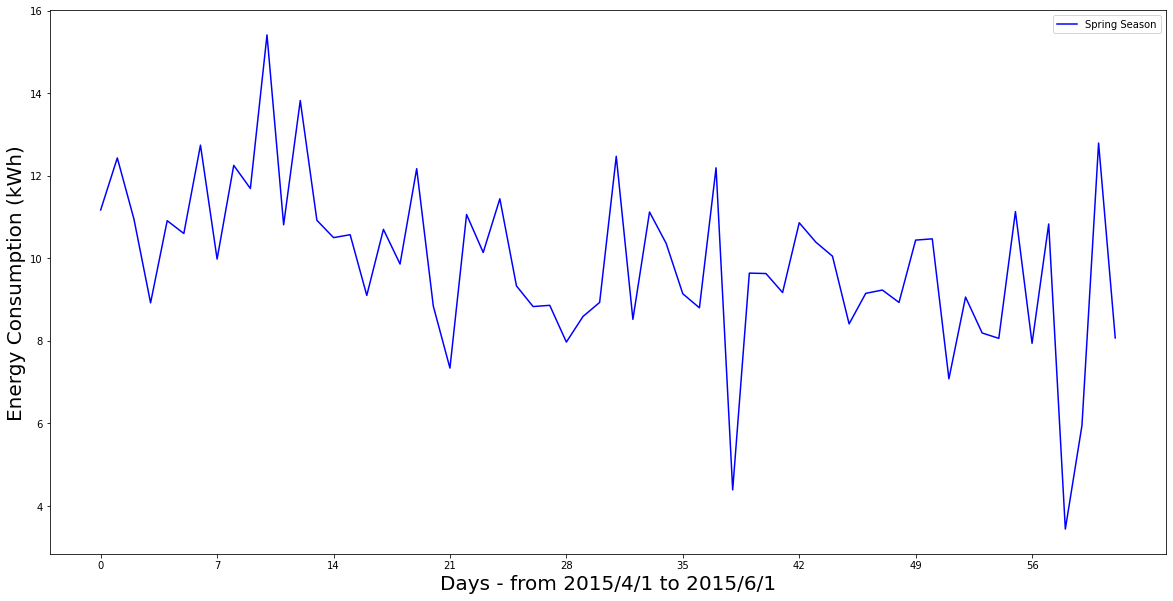

In [51]:
spring = df.loc[i, '2015/4/1':'2015/6/1']
plt.figure(figsize=(20, 10))
plt.plot(spring, color='blue')
plt.xticks(range(0, len(spring), 7), range(0, len(spring), 7)) 
plt.xlabel('Days - from 2015/4/1 to 2015/6/1', fontsize=20)
plt.ylabel('Energy Consumption (kWh)', fontsize=20)
plt.legend(['Spring Season'])
plt.savefig('plots/seasonality/row_10013_spring_season.png')

In [52]:
days = [0]*7
for i in range(0, len(spring)-7, 7):
    for j in range(7):
        days[j] += spring[i+j]
for j in range(7):
    days[j] /= (len(spring)/7)

In [53]:
days_spring = days

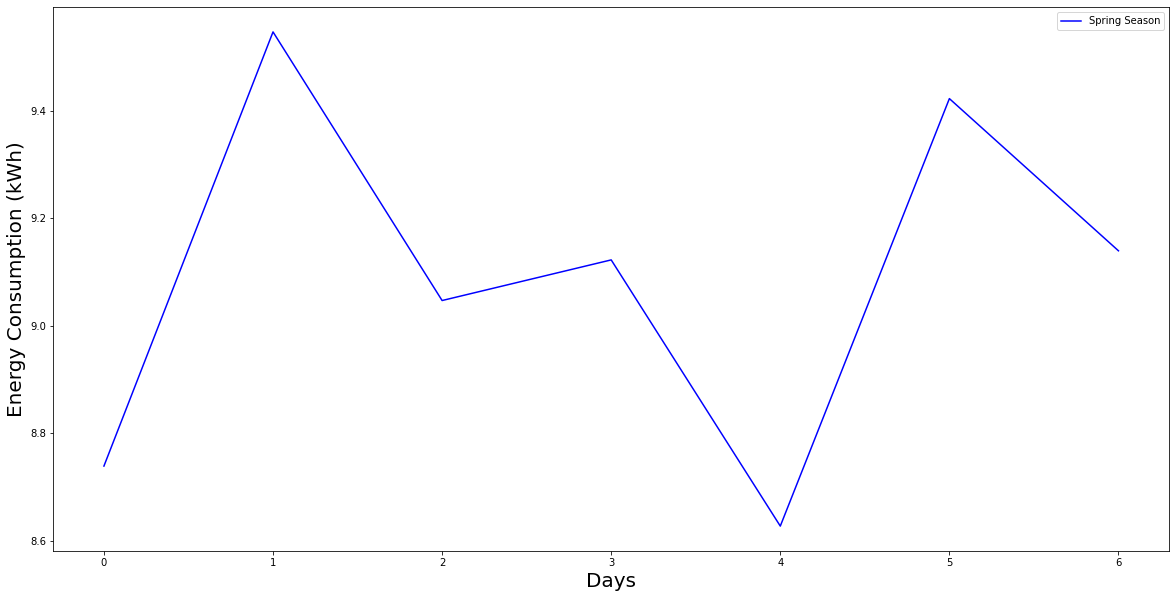

In [55]:
plt.figure(figsize=(20, 10))
plt.plot(days_spring, color='blue')
plt.xticks(range(7), range(7))
plt.xlabel('Days', fontsize=20)
plt.ylabel('Energy Consumption (kWh)', fontsize=20)
plt.legend(['Spring Season'])
plt.savefig('plots/seasonality/spring_weeks.png')

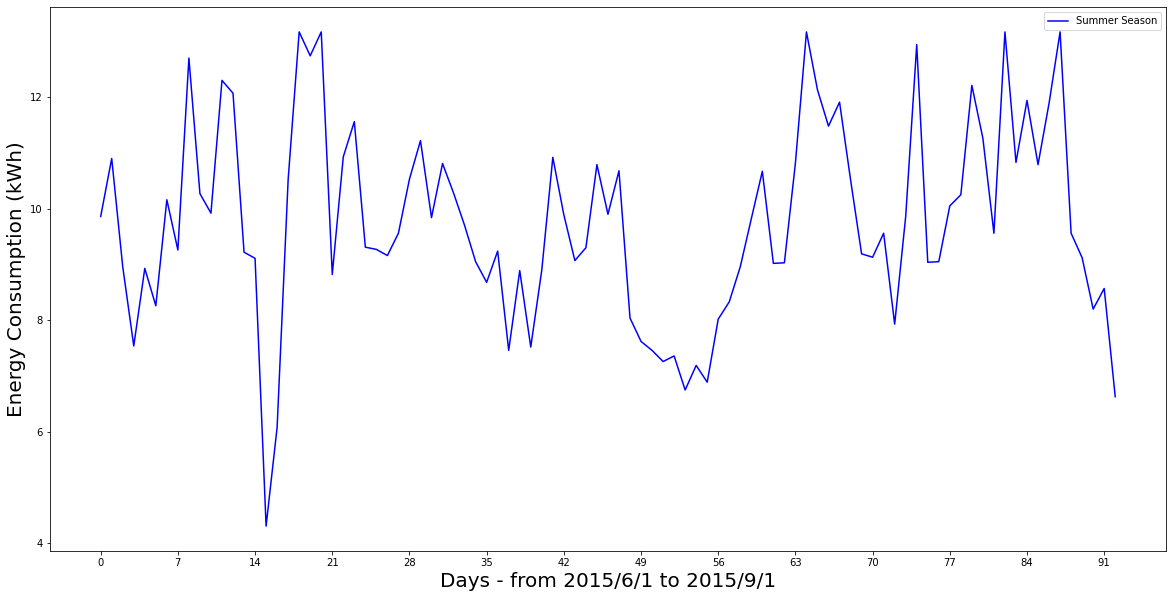

In [56]:
summer = df.loc[i, '2015/6/1':'2015/9/1']
plt.figure(figsize=(20, 10))
plt.plot(summer, color='blue')
plt.xticks(range(0, len(summer), 7), range(0, len(summer), 7)) 
plt.xlabel('Days - from 2015/6/1 to 2015/9/1', fontsize=20)
plt.ylabel('Energy Consumption (kWh)', fontsize=20)
plt.legend(['Summer Season'])
plt.savefig('plots/seasonality/row_10013_summer_season.png')

In [57]:
days = [0]*7
for i in range(0, len(summer)-7, 7):
    for j in range(7):
        days[j] += summer[i+j]
for j in range(7):
    days[j] /= (len(summer)/7)

In [58]:
days_summer = days

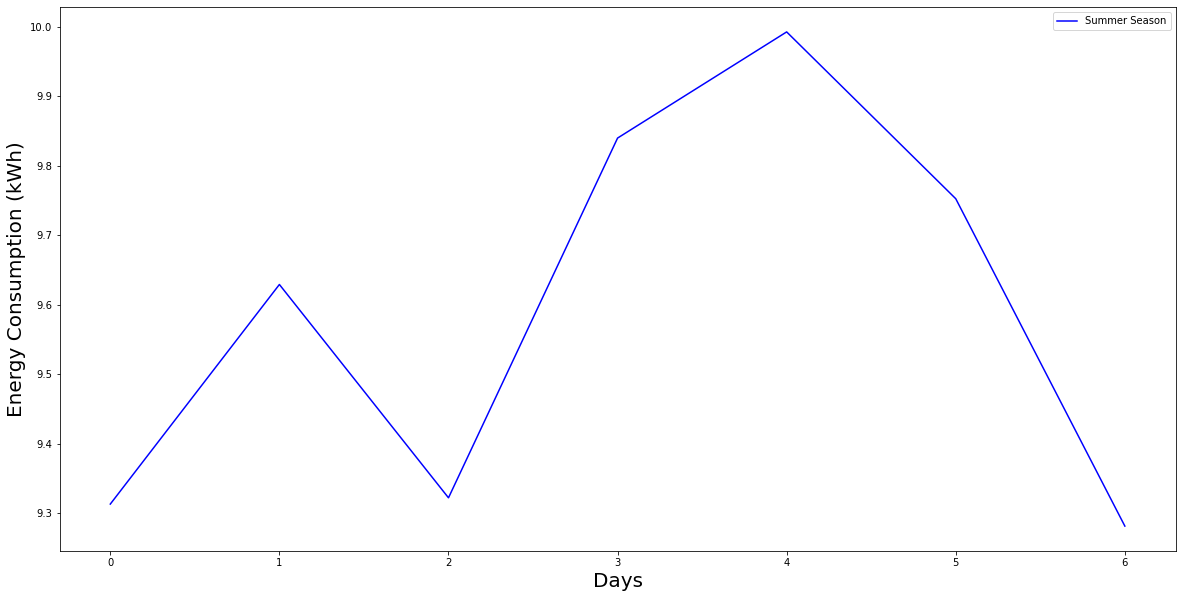

In [59]:
plt.figure(figsize=(20, 10))
plt.plot(days_summer, color='blue')
plt.xticks(range(7), range(7))
plt.xlabel('Days', fontsize=20)
plt.ylabel('Energy Consumption (kWh)', fontsize=20)
plt.legend(['Summer Season'])
plt.savefig('plots/seasonality/summer_weeks.png')

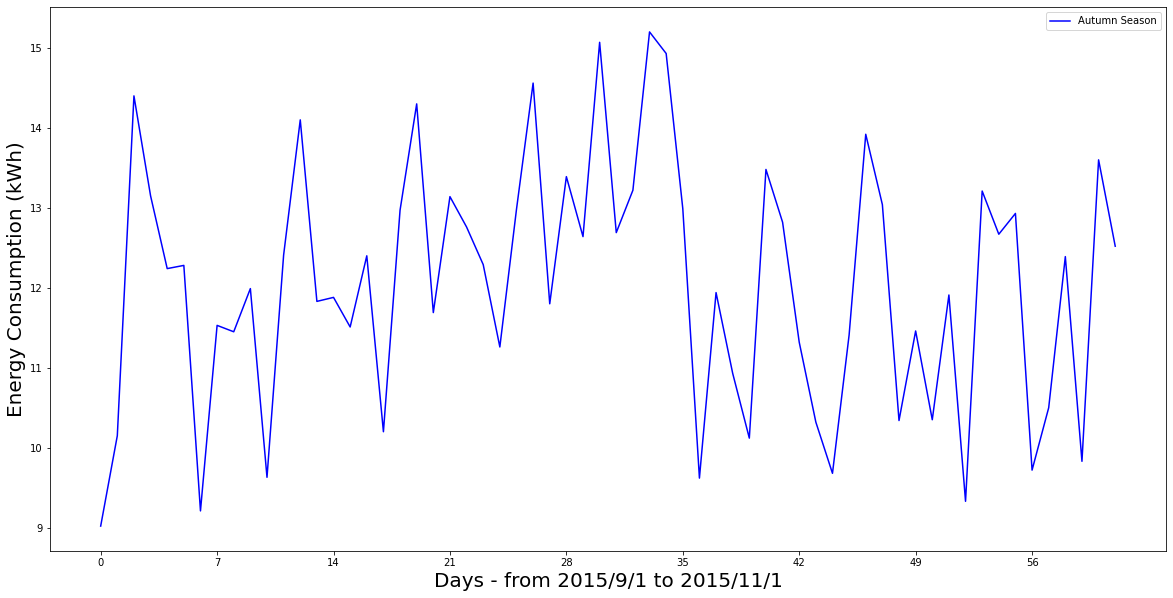

In [60]:
autumn = df.loc[i, '2015/9/1':'2015/11/1']
plt.figure(figsize=(20, 10))
plt.plot(autumn, color='blue')
plt.xticks(range(0, len(autumn), 7), range(0, len(autumn), 7)) 
plt.xlabel('Days - from 2015/9/1 to 2015/11/1', fontsize=20)
plt.ylabel('Energy Consumption (kWh)', fontsize=20)
plt.legend(['Autumn Season'])
plt.savefig('plots/seasonality/row_10013_autumn_season.png')

In [61]:
days = [0]*7
for i in range(0, len(autumn)-7, 7):
    for j in range(7):
        days[j] += autumn[i+j]
for j in range(7):
    days[j] /= (len(autumn)/7)

In [62]:
days_autumn = days

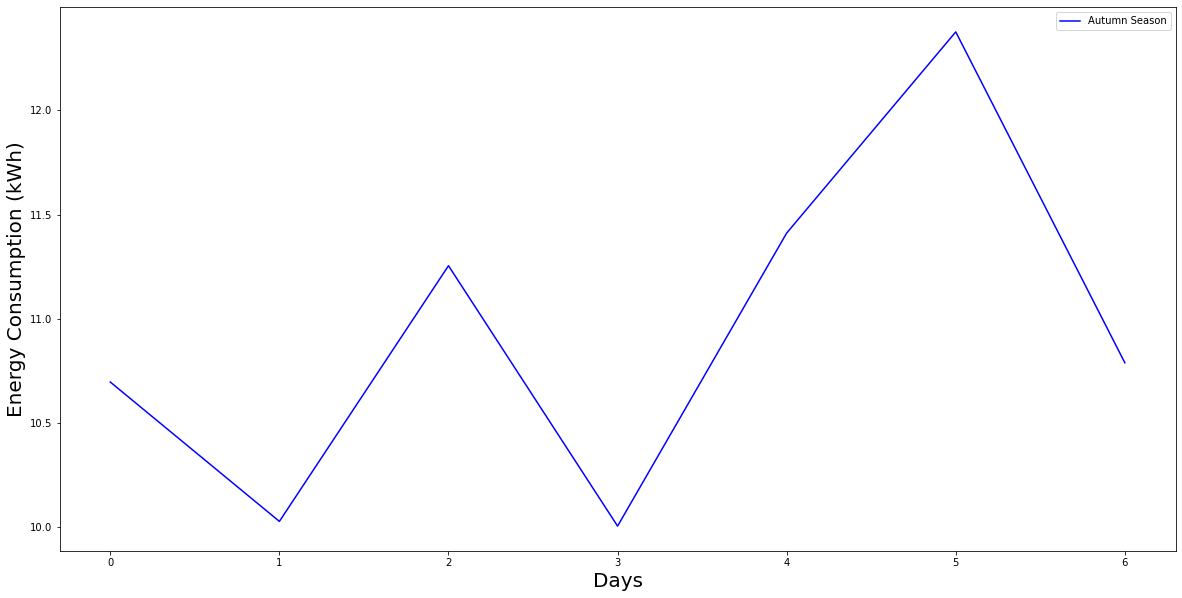

In [63]:
plt.figure(figsize=(20, 10))
plt.plot(days_autumn, color='blue')
plt.xticks(range(7), range(7))
plt.xlabel('Days', fontsize=20)
plt.ylabel('Energy Consumption (kWh)', fontsize=20)
plt.legend(['Autumn Season'])
plt.savefig('plots/seasonality/autumn_weeks.png')

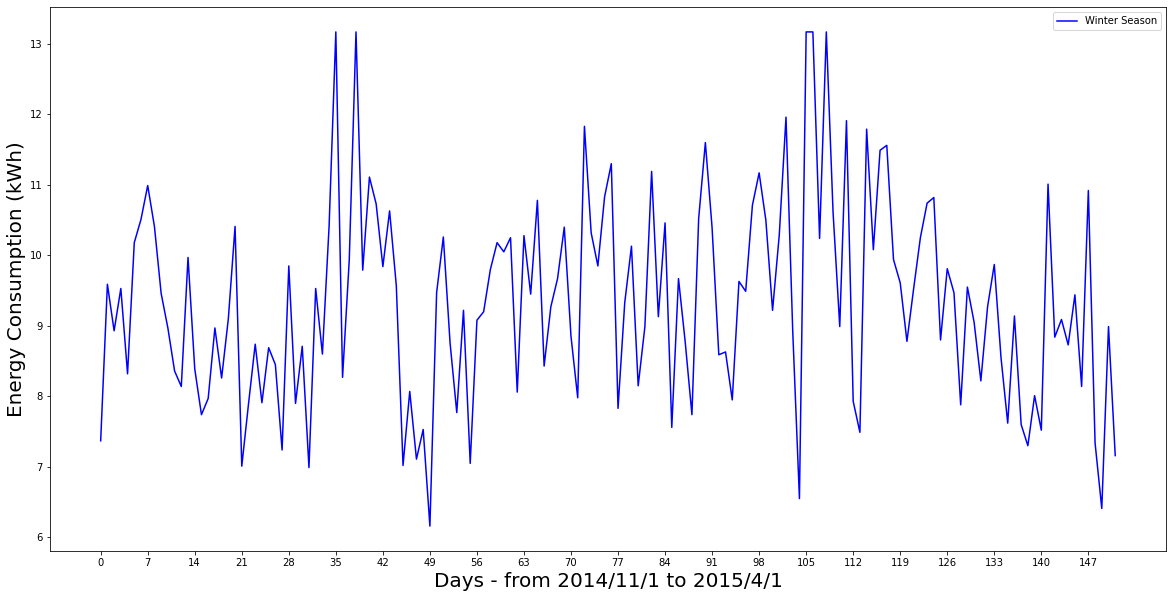

In [64]:
winter = df.loc[i, '2014/11/1':'2015/4/1']
plt.figure(figsize=(20, 10))
plt.plot(winter, color='blue')
plt.xticks(range(0, len(winter), 7), range(0, len(winter), 7)) 
plt.xlabel('Days - from 2014/11/1 to 2015/4/1', fontsize=20)
plt.ylabel('Energy Consumption (kWh)', fontsize=20)
plt.legend(['Winter Season'])
plt.savefig('plots/seasonality/row_10013_winter_season.png')

In [65]:
days = [0]*7
for i in range(0, len(winter)-7, 7):
    for j in range(7):
        days[j] += winter[i+j]
for j in range(7):
    days[j] /= (len(winter)/7)

In [66]:
days_winter = days

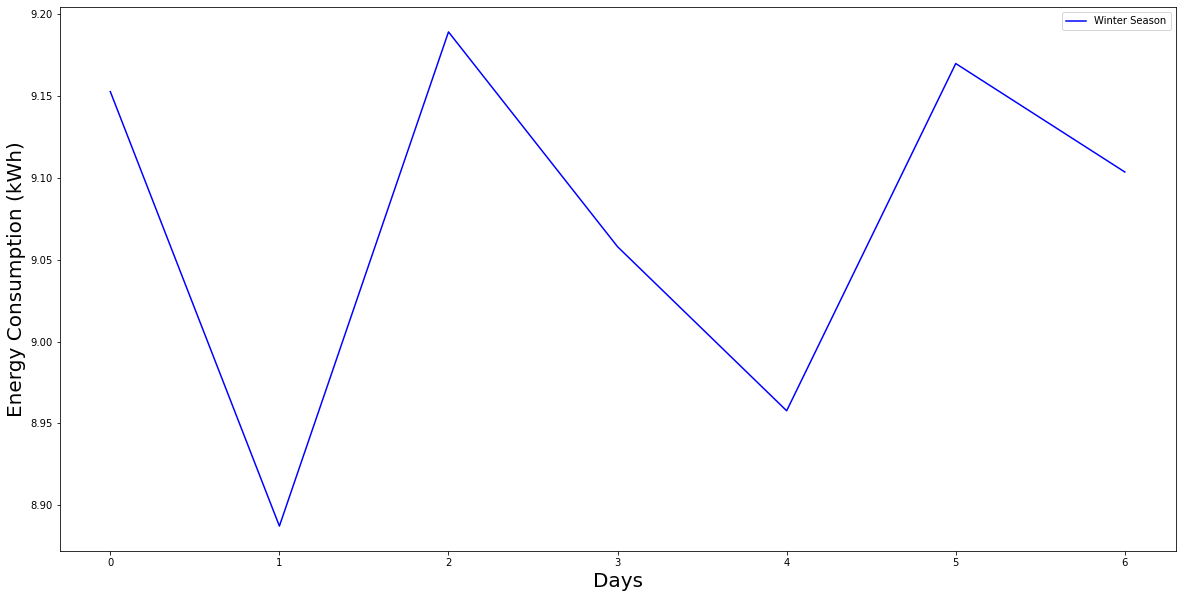

In [67]:
plt.figure(figsize=(20, 10))
plt.plot(days_winter, color='blue')
plt.xticks(range(7), range(7))
plt.xlabel('Days', fontsize=20)
plt.ylabel('Energy Consumption (kWh)', fontsize=20)
plt.legend(['Winter Season'])
plt.savefig('plots/seasonality/winter_weeks.png')

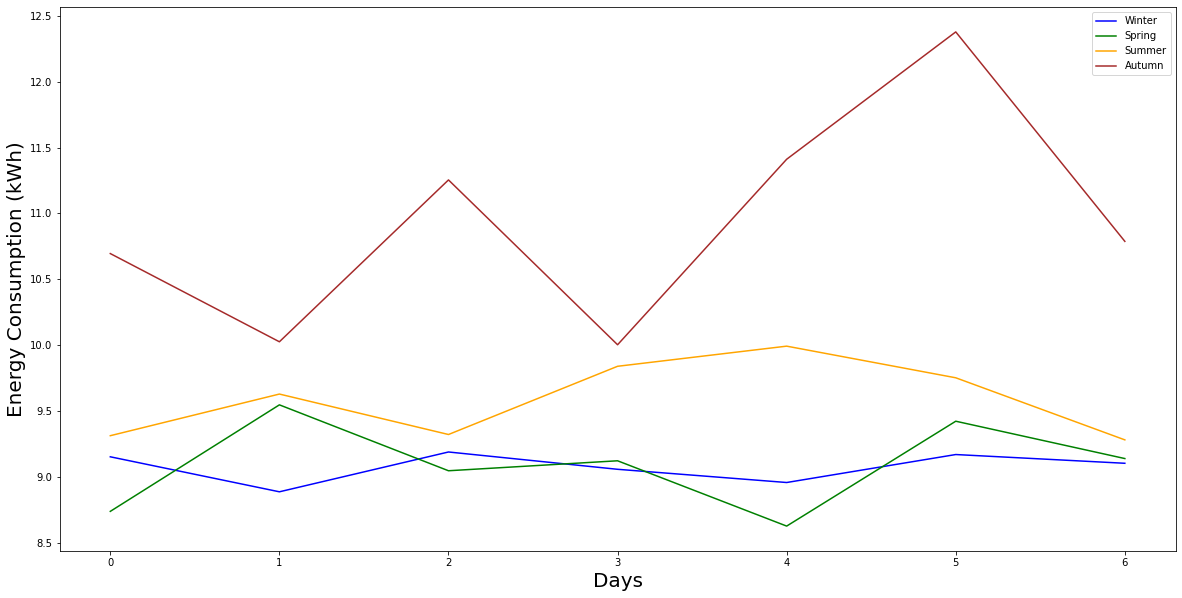

In [68]:
plt.figure(figsize=(20, 10))
plt.plot(days_winter, color='blue')
plt.plot(days_spring, color='green')
plt.plot(days_summer, color='orange')
plt.plot(days_autumn, color='brown')
plt.xticks(range(7), range(7))
plt.xlabel('Days', fontsize=20)
plt.ylabel('Energy Consumption (kWh)', fontsize=20)
plt.legend(['Winter', 'Spring', 'Summer', 'Autumn'])
plt.savefig('plots/seasonality/all_seasons_weeks.png')

In [69]:
total=len(winter.to_list()+spring.to_list()+summer.to_list()+autumn.to_list())

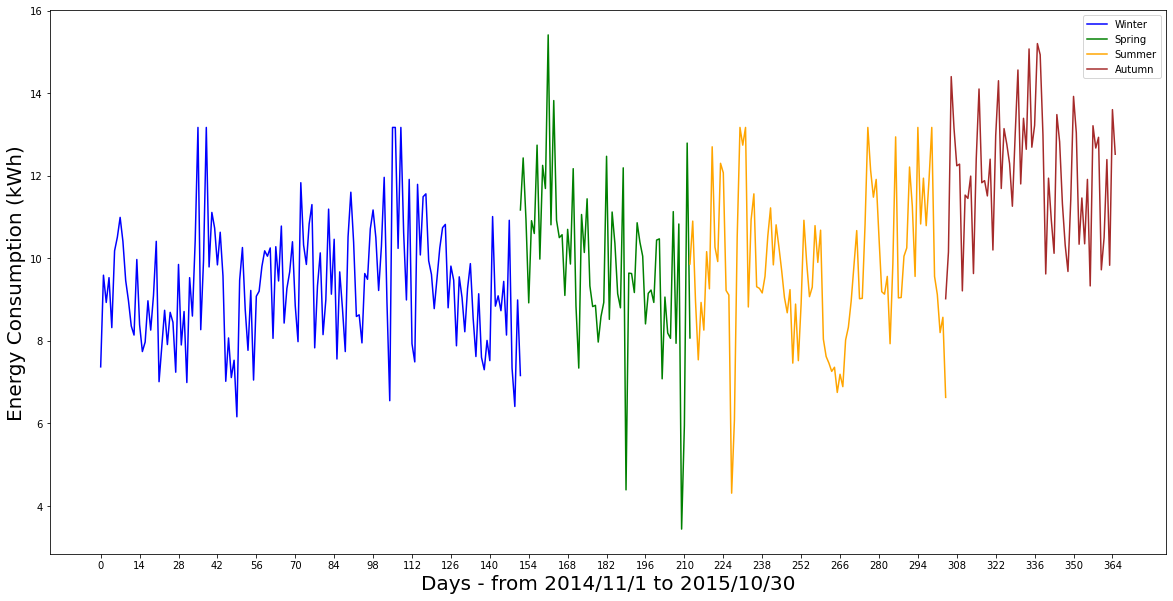

In [72]:
plt.figure(figsize=(20, 10))
plt.plot(winter, color='blue')
plt.plot(spring, color='green')
plt.plot(summer, color='orange')
plt.plot(autumn, color='brown')
plt.xticks(range(0, total, 14), range(0, total, 14)) 
#plt.yticks(range(0, 25, 5), range(0, 25, 5)) 
plt.xlabel('Days - from 2014/11/1 to 2015/10/30', fontsize=20)
plt.ylabel('Energy Consumption (kWh)', fontsize=20)
plt.legend(['Winter', 'Spring', 'Summer', 'Autumn'])
plt.savefig('plots/seasonality/all_seasons.png')

In [3]:
a = np.random.randn(2,2)
a

array([[ 0.42697919,  1.24411799],
       [-2.58272145,  0.39084096]])

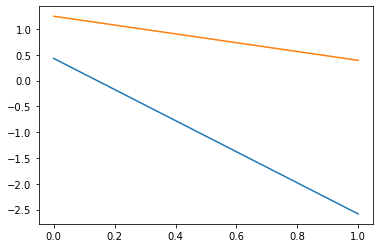

In [4]:
plt.plot(a)

In [29]:
labels = ['Positive', 'Negative']

In [30]:
a = np.array([[1, 2], [3, 4]])
a

array([[1, 2],
       [3, 4]])

Text(0, 0.5, 'Actual Value')

<Figure size 1440x1440 with 0 Axes>

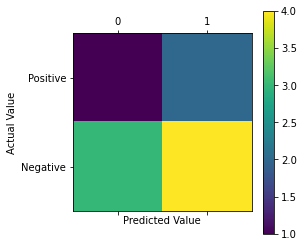

In [60]:
plt.figure(figsize=(20, 20))
plt.matshow(a)
plt.colorbar()
plt.xticks(range(len(labels)), labels, position=[0,0])
plt.yticks(range(len(labels)), labels)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
#plt.set_label_position('top') 
#plt.set_yticklabels([''] + labels)

array([[1, 2],
       [3, 4]])

In [38]:
ax = plt.figure()
ax

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>